Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!
  
  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 14

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=7
num_BackTrack_Days=0

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=4 # =(8/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
245                                           NaN             Timor-Leste   
246                                           NaN                    Togo   
247                                           NaN     Trinidad and Tobago   
248                                           NaN                 Tunisia   
249                                           NaN                  Turkey   
250                                           NaN           United States   
251                                           NaN                  Uganda   
252                                           NaN                 Ukraine   
253                                           NaN    United Arab Emirates   
254                                      Anguilla          United Kingdom   
255                                       Bermuda          United Kingdom   
256                        British Virgin Islands          United Kingdom   
257                                Cayman Islands          United Kingdom   
258                               Channel Islands          United Kingdom   
259                   Falkland Islands (Malvinas)          United Kingdom   
260                                     Gibraltar          United Kingdom   
261                                   Isle of Man          United Kingdom   
262                                    Montserrat          United Kingdom   
263  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
264                      Turks and Caicos Islands          United Kingdom   
265                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
251                                           NaN             Timor-Leste   
252                                           NaN                    Togo   
253                                           NaN     Trinidad and Tobago   
254                                           NaN                 Tunisia   
255                                           NaN                  Turkey   
256                                           NaN           United States   
257                                           NaN                  Uganda   
258                                           NaN                 Ukraine   
259                                           NaN    United Arab Emirates   
260                                      Anguilla          United Kingdom   
261                                       Bermuda          United Kingdom   
262                        British Virgin Islands          United Kingdom   
263                                Cayman Islands          United Kingdom   
264                               Channel Islands          United Kingdom   
265                   Falkland Islands (Malvinas)          United Kingdom   
266                                     Gibraltar          United Kingdom   
267                                   Isle of Man          United Kingdom   
268                                    Montserrat          United Kingdom   
269  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
270                      Turks and Caicos Islands          United Kingdom   
271                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/21  5/5/21  5/6/21  5/7/21  \
185        0        0        0        0  ...       0       0       0       0   
186        0        0        0        0  ...     455     456     456     456   
187        0        0        0        0  ...      17      17      17      17   
188        0        0        0        0  ...  217740  218007  218173  218657   
189        0        0        0        0  ...       0       0       0       0   
190        0        0        0        0  ...    5869    5892    5912    5929   
191        0        0        0        0  ...      32      32      32      32   
192        0        0        0        0  ...     130     130     153     160   
193        0        0        0        0  ...    1516    1521    1526    1533   
194        0        0        0        0  ...    9038    9043    9049    9057   

     5/8/21  5/9/21  5/10/21  5/11/21   Population                 region  
185       0       0        0        0           NaN  Marshall Islands_nan  
186     456     456      456      456     4,649,658        Mauritania_nan  
187      17      17       17       17           NaN         Mauritius_nan  
188  218928  218985   219089   219323   128,640,794            Mexico_nan  
189       0       0        0        0           NaN        Micronesia_nan  
190    5943    5952     5958     5970     4,035,942           Moldova_nan  
191      32      32       32       32        39,183            Monaco_nan  
192     162     170      179      184     3,278,290          Mongolia_nan  
193    1536    1540     1544     1545       622 500        Montenegro_nan  
194    9064    9072     9077     9083    36,817,128           Morocco_nan  

[10 rows x 482 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN       Mongolia  46.862500  103.84670   
176                               NaN     Montenegro  42.708678   19.37439   
177                               NaN        Morocco  31.791700   -7.09260   
178                               NaN     Mozambique -18.665700   35.52960   
179                               NaN        Namibia -22.957600   18.49040   
180                               NaN          Nepal  28.166700   84.25000   
181                             Aruba    Netherlands  12.521100  -69.96830   
182  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
183                           Curacao    Netherlands  12.169600  -68.99000   
184                      Sint Maarten    Netherlands  18.042500  -63.05480   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  5/4/21  \
175        0        0        0        0        0        0  ...   25641   
176        0        0        0        0        0        0  ...   94216   
177        0        0        0        0        0        0  ...  499089   
178        0        0        0        0        0        0  ...   67342   
179        0        0        0        0        0        0  ...   46238   
180        0        0        0        0        0        0  ...  287790   
181        0        0        0        0        0        0  ...   10467   
182        0        0        0        0        0        0  ...    1532   
183        0        0        0        0        0        0  ...   11816   
184        0        0        0        0        0        0  ...    2189   

     5/5/21  5/6/21  5/7/21  5/8/21  5/9/21  5/10/21  5/11/21   Population   \
175   25641   28533   29984   29984   32660    34230    35733     3,278,290   
176   94363   94495   94655   94803   94963    95070    95220       622 500   
177  499491  499917  500192  500540  500914   501146   501404    36,817,128   
178   67343   67696   67706   67749   67785    67799    67884    31,542,919   
179   46683   46922   47146   47173   47300    47384    47518     2,540,905   
180  289783  292490  295395  298765  302787   306794   312019    29,300,000   
181   10482   10482   10505   10564   10573    10587    10596       116,600   
182    1532    1540    1542    1542    1544     1545     1548        26,000   
183   11864   11907   11920   11936   11957    11972    11992       158,665   
184    2193    2197    2197    2203    2203     2206     2208           NaN   

                                           region  
175                                  Mongolia_nan  
176                                Montenegro_nan  
177                                   Morocco_nan  
178                                Mozambique_nan  
179                                   Namibia_nan  
180                                     Nepal_nan  
181                             Netherlands_Aruba  
182  Netherlands_Bonaire, Sint Eustatius and Saba  
183                           Netherlands_Curacao  
184                      Netherlands_Sint Maarten  

[10 rows x 482 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   5/4/21   5/5/21   5/6/21  \
185        0        0        0        0  ...        4        4        4   
186        0        0        0        0  ...    18503    18542    18576   
187        0        0        0        0  ...     1214     1216     1216   
188        0        0        0        0  ...  2352964  2355985  2358831   
189        0        0        0        0  ...        1        1        1   
190        0        0        0        0  ...   251504   251820   252153   
191        0        0        0        0  ...     2468     2471     2475   
192        0        0        0        0  ...    41524    41524    43201   
193        0        0        0        0  ...    97813    97930    98042   
194        0        0        0        0  ...   512285   512656   513016   

      5/7/21   5/8/21   5/9/21  5/10/21  5/11/21   Population   \
185        4        4        4        4        4           NaN   
186    18613    18636    18667    18691    18691     4,649,658   
187     1226     1240     1246     1256     1257           NaN   
188  2361874  2364617  2365792  2366496  2368393   128,640,794   
189        1        1        1        1        1           NaN   
190   252413   252604   252749   252798   252949     4,035,942   
191     2477     2479     2479     2481     2486        39,183   
192    44016    44820    45459    45936    46448     3,278,290   
193    98142    98237    98303    98365    98449       622 500   
194   513314   513628   513864   513922   514164    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 482 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Russia  61.524010  105.318756   
221            NaN                            Rwanda  -1.940300   29.873900   
222            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
223            NaN                       Saint Lucia  13.909400  -60.978900   
224            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
225            NaN                             Samoa -13.759000 -172.104600   
226            NaN                        San Marino  43.942400   12.457800   
227            NaN             Sao Tome and Principe   0.186400    6.613100   
228            NaN                      Saudi Arabia  23.885942   45.079162   
229            NaN                           Senegal  14.497400  -14.452400   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...   5/4/21  \
220        0        0        0        0        0        0  ...  4784497   
221        0        0        0        0        0        0  ...    25351   
222        0        0        0        0        0        0  ...       45   
223        0        0        0        0        0        0  ...     4573   
224        0        0        0        0        0        0  ...     1882   
225        0        0        0        0        0        0  ...        3   
226        0        0        0        0        0        0  ...     5067   
227        0        0        0        0        0        0  ...     2311   
228        0        0        0        0        0        0  ...   421300   
229        0        0        0        0        0        0  ...    40492   

      5/5/21   5/6/21   5/7/21   5/8/21   5/9/21  5/10/21  5/11/21  \
220  4792354  4799872  4808133  4816331  4824621  4832959  4840948   
221    25421    25486    25539    25586    25652    25714    25773   
222       45       45       45       45       45       45       45   
223     4585     4607     4607     4654     4654     4690     4700   
224     1882     1889     1895     1912     1912     1922     1922   
225        3        3        3        3        3        3        3   
226     5067     5067     5067     5067     5067     5083     5083   
227     2314     2317     2317     2318     2318     2318     2320   
228   422316   423406   424445   425442   426384   427370   428369   
229    40544    40578    40621    40665    40692    40714    40729   

      Population                                 region  
220   144,500,000                            Russia_nan  
221    12,952,218                            Rwanda_nan  
222           NaN             Saint Kitts and Nevis_nan  
223       184,106                       Saint Lucia_nan  
224       110,940  Saint Vincent and the Grenadines_nan  
225           NaN                             Samoa_nan  
226        33,916                        San Marino_nan  
227           NaN             Sao Tome and Principe_nan  
228    34,695,447                      Saudi Arabia_nan  
229    16,743,927                           Senegal_nan  

[10 rows x 482 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

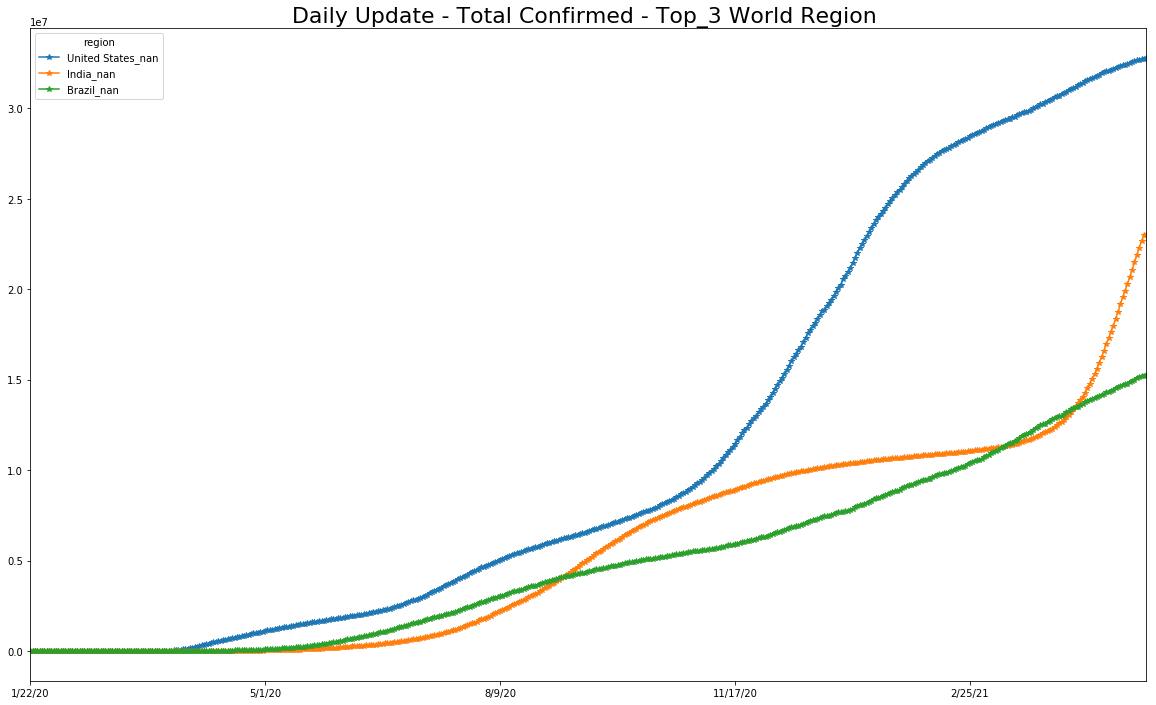

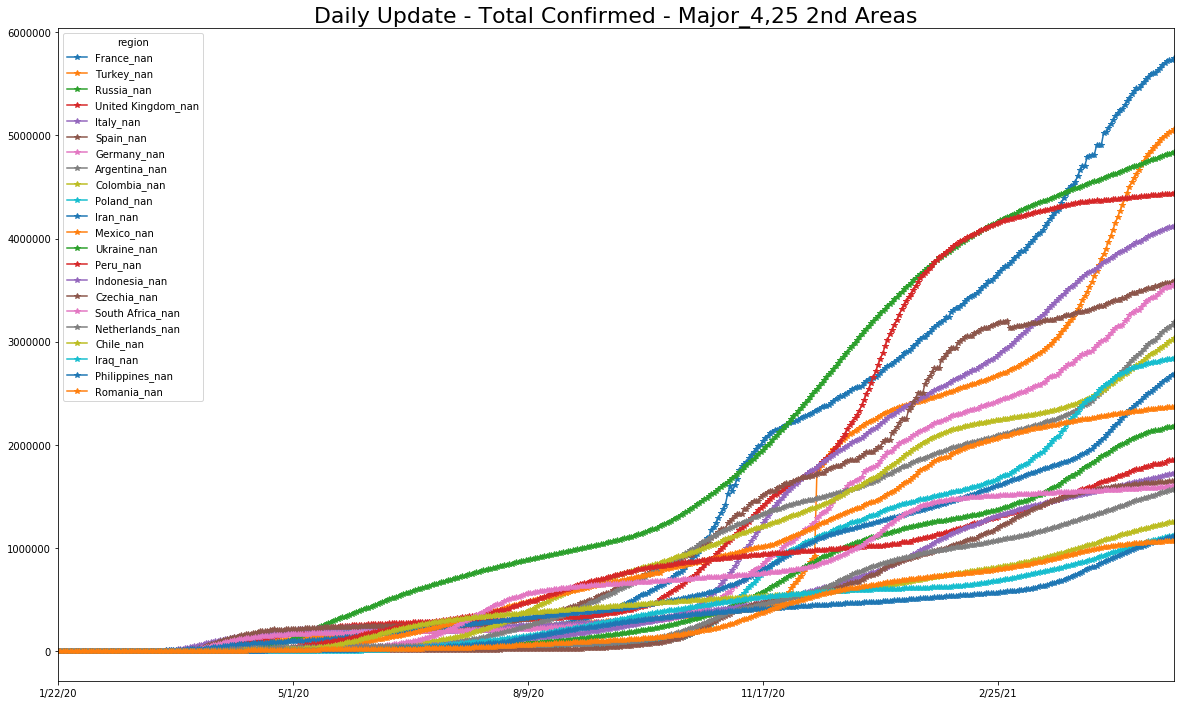

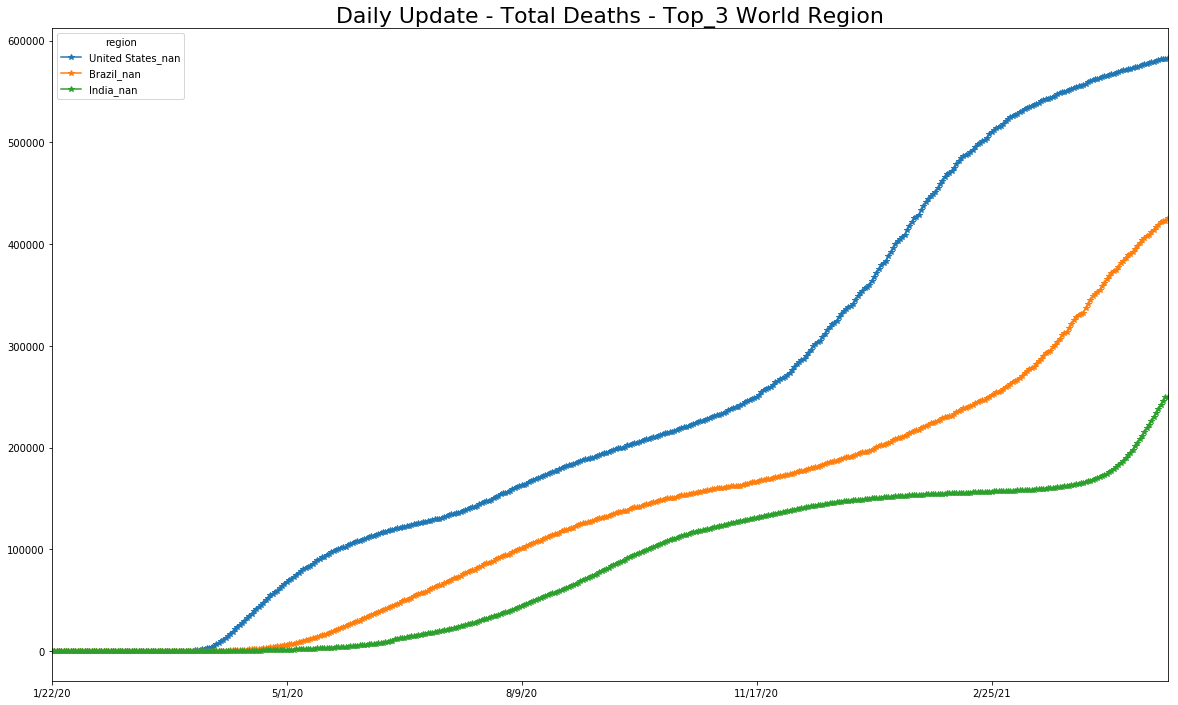

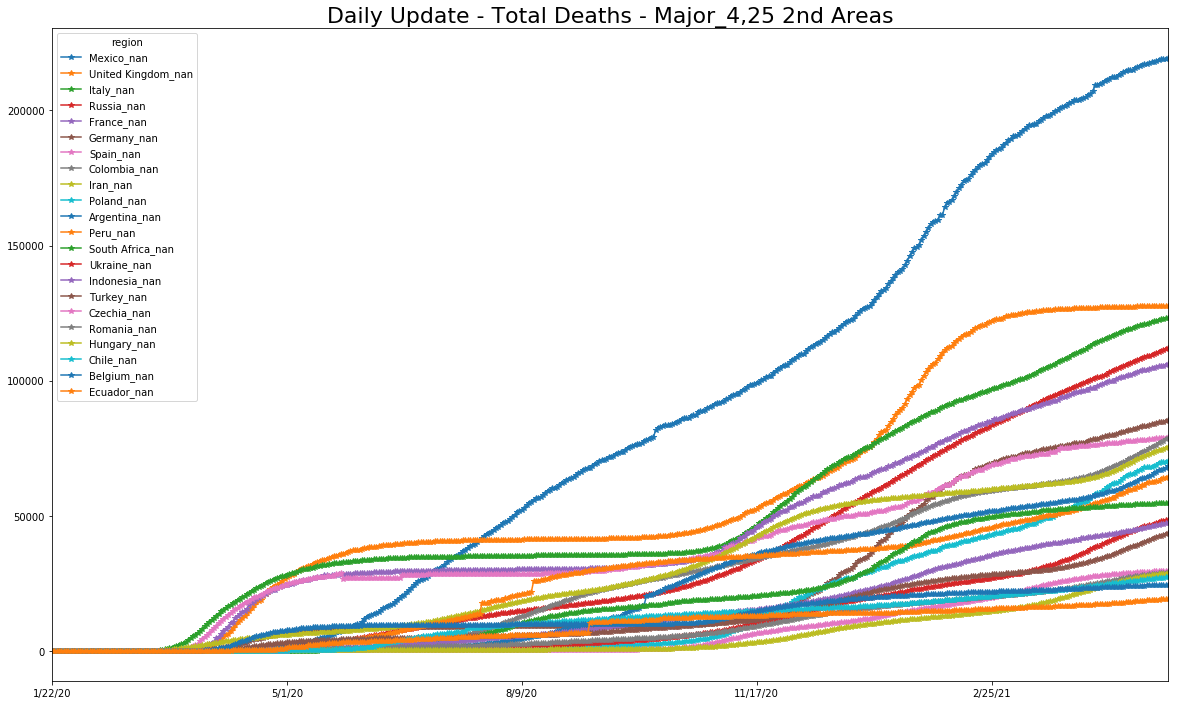

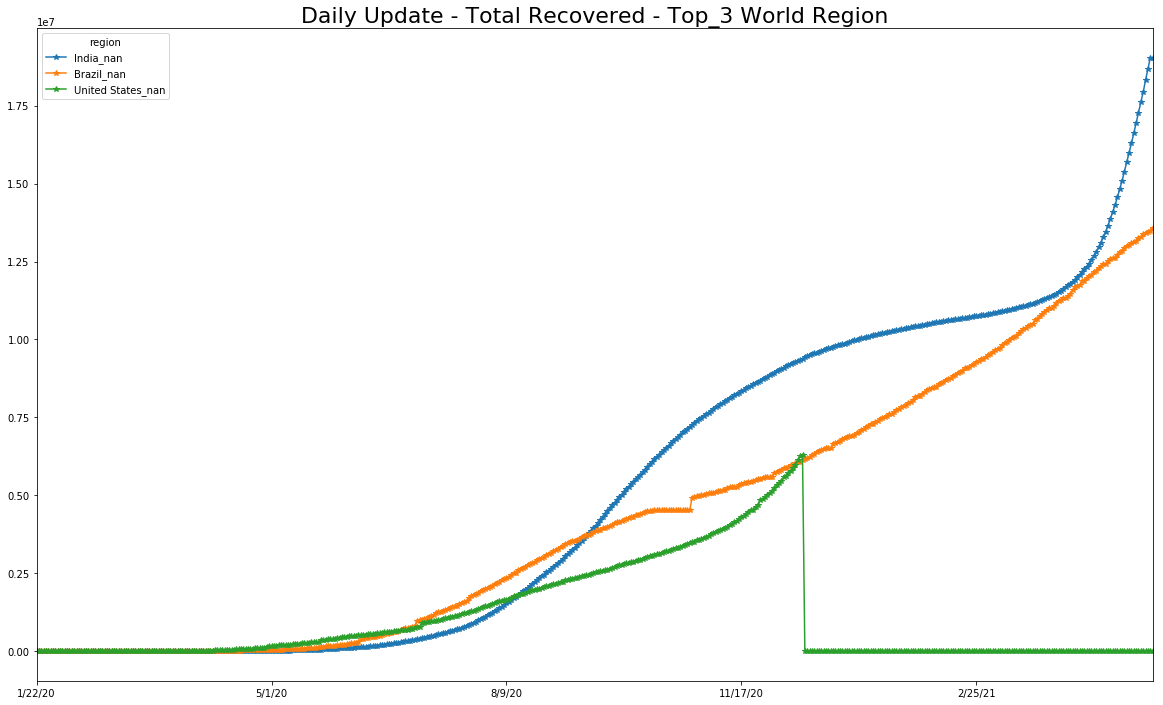

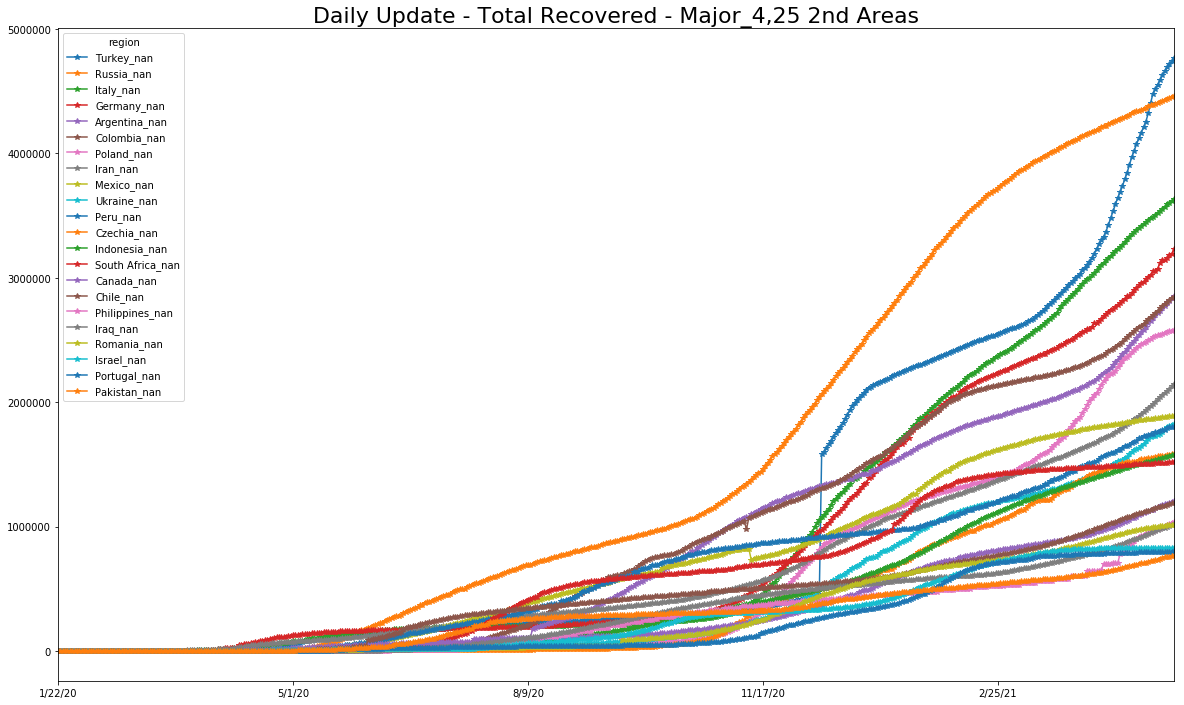

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/05/12


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
## DROP_N=15
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522914         1808           47287            0   
9/14/20  ...            6557342         1812           47836            0   
9/15/20  ...            6596849         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 275 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
5/8/21             61755       131666       123900        13406       28477   
5/9/21             61842       131723       124104        13423       28740   
5/10/21            62063       131753       124288        13429       28875   
5/11/21            62403       131803       124483        13447       29146   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
5/8/21                      1232        3136158       219092   
5/9/21                      1231        3147740       219270   
5/10/21                     1237        3165121       219353   
5/11/21                     1238        3191097       219596   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
5/8/21                                      124                       5533   
5/9/21                                      124                       5538   
5/10/21                                     124                       5542   
5/11/21                                     124                       5546   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
5/8/21   ...           32686965       218800           93978            4   
5/9/21   ...           32708357       220683           94397            4   
5/10/21  ...           32745255       222870           94759            4   
5/11/21  ...           32778374       225847           95072            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
5/8/21          206549         3245                  301437       6462   
5/9/21          207870         3412                  301751       6482   
5/10/21         209162         3489                  302249       6485   
5/11/21         210116         3571                  302777       6492   

region   Zambia_nan  Zimbabwe_nan  
5/8/21        92057         38414  
5/9/21        92092         38419  
5/10/21       92112         38433  
5/11/21       92152         38448  

[4 rows x 275 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
67972 2021-04-13     Zimbabwe_nan      37330            19           160   
67973 2021-04-14     Zimbabwe_nan      37369            23            57   
67974 2021-04-15     Zimbabwe_nan      37422            39            81   
67975 2021-04-16     Zimbabwe_nan      37534            53           115   
67976 2021-04-17     Zimbabwe_nan      37699           112           204   
67977 2021-04-18     Zimbabwe_nan      37751           165           330   
67978 2021-04-19     Zimbabwe_nan      37859            52           329   
67979 2021-04-20     Zimbabwe_nan      37875           108           325   
67980 2021-04-21     Zimbabwe_nan      37980            16           176   
67981 2021-04-22     Zimbabwe_nan      38018           105           229   
67982 2021-04-23     Zimbabwe_nan      38045            38           159   
67983 2021-04-24     Zimbabwe_nan      38064            27           170   
67984 2021-04-25     Zimbabwe_nan      38086            19            84   
67985 2021-04-26     Zimbabwe_nan      38102            22            68   
67986 2021-04-27     Zimbabwe_nan      38164            16            57   
67987 2021-04-28     Zimbabwe_nan      38191            62           100   
67988 2021-04-29     Zimbabwe_nan      38235            27           105   
67989 2021-04-30     Zimbabwe_nan      38257            44           133   
67990 2021-05-01     Zimbabwe_nan      38260            22            93   
67991 2021-05-02     Zimbabwe_nan      38281             3            69   
67992 2021-05-03     Zimbabwe_nan      38293            21  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
68001 2021-05-12  Zimbabwe_nan          0            15            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
68001           121         100.039055         100.088535          100.31573   

       last_day  kalman_prediction  population  infected_rate  min  max  
68001     38448            38467.0    14862924       0.000026  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
68001 2021-05-12  Zimbabwe_nan          0            15            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
68001           121         100.039055         100.088535          100.31573   

       last_day  kalman_prediction  population  infected_rate  min  max  
68001     38448            38467.0    14862924       0.000026  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
66547  2021-05-10  Zimbabwe_nan      38433             5            21   
66548  2021-05-11  Zimbabwe_nan      38448            14            30   
66549  2021-05-12  Zimbabwe_nan          0            15            34   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
66547           138         100.013042         100.054716         100.360518   
66548           140         100.036466         100.078145         100.365628   
66549           121         100.039055         100.088535         100.315730   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
66547                38419  ...    14862924       0.000026  NaN  NaN   
66548                38433  ...    14862924       0.000026  NaN  NaN   
66549                38448  ...    14862924       0.000026  NaN  NaN   

       population_percentage : infected_rate confirmed  \
66547                                         0.002585   
66548                                         0.002586   
66549                                         0.002587   

       population_percentage : factor 9/10 infected_rate confirmed  \
66547                                           0.023265             
66548                                           0.023273             
66549                                           0.023282             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
66547                    32.0                           2.153008   
66548                    25.0                           1.682038   
66549                    19.0                           1.278349   

       delta : roling 7day AVG  \
66547                19.714286   
66548                20.000000   
66549                17.285714   

       delta : aprox 14-day case notification rate per 100k hab  
66547                                           1.856970         
66548                                           1.883882         
66549                                           1.628213         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse            mae
265  United States_nan  4.474919e+12  2.115400e+06  163612.107884


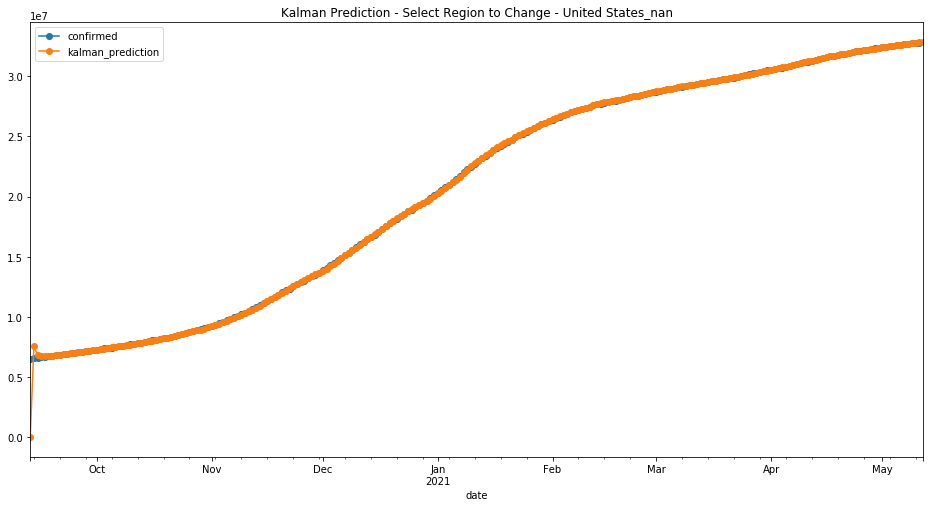

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse           mae
214  Russia_nan  9.768338e+10  312543.39895  22509.568465


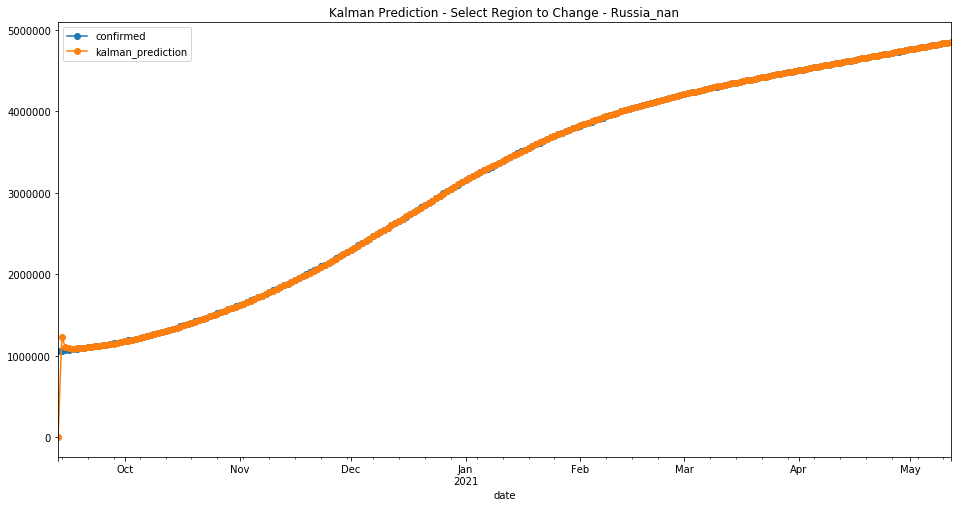

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse           rmse           mae
30  Brazil_nan  9.793836e+11  989638.124731  86381.659751


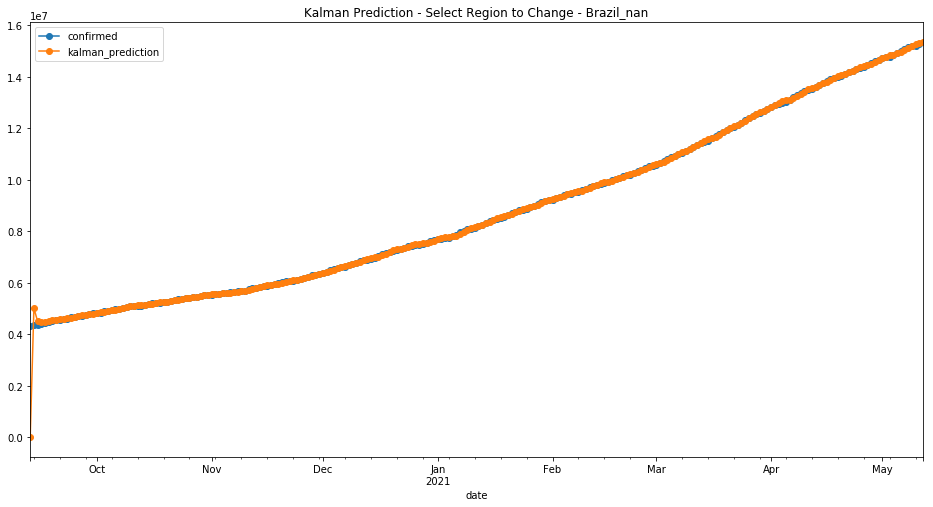

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
264  United Kingdom_nan  8.192329e+10  286222.452109  23147.286307


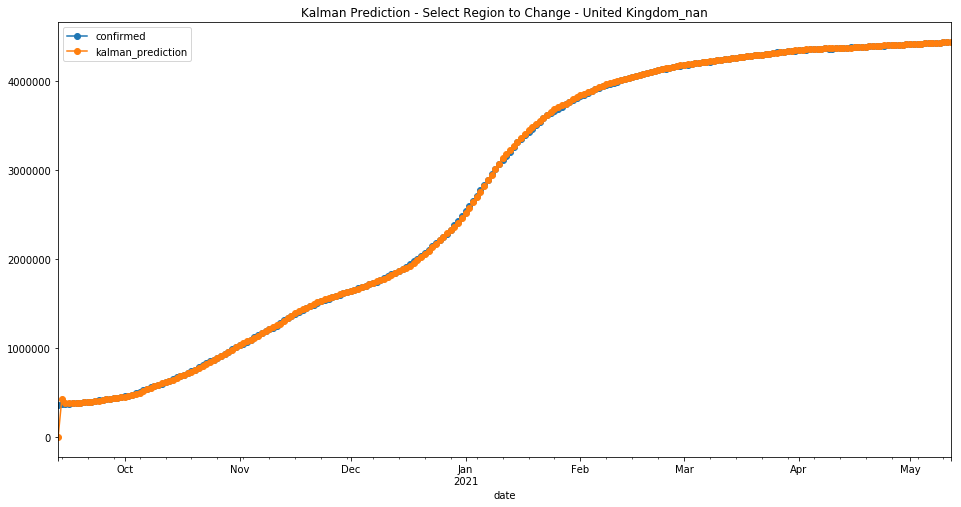

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpy6u_8dd0
  JVM stdout: /tmp/tmpy6u_8dd0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpy6u_8dd0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         02 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 6 months and 15 days !!!
H2O cluster name:           H2O_from_python_unknownUser_7it3bp
H2O cluster total nodes:    1
H2O cluster free memory:    3.541 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-05-05
last_train_date= 2021-05-11
first_bootstrap_date= 2021-05-03
boost_bootstrap_date= 2021-05-08
first_test_date= 2021-05-02
last_test_date= 2021-05-12
first_valid_date= 2021-05-10


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    60408.0      60300 2021-05-03  Afghanistan_nan
1    60591.0      60563 2021-05-04  Afghanistan_nan
2    60848.0      60797 2021-05-05  Afghanistan_nan
3    61083.0      61162 2021-05-06  Afghanistan_nan
4    61451.0      61455 2021-05-07  Afghanistan_nan
5    61761.0      61755 2021-05-08  Afghanistan_nan
6    62093.0      61842 2021-05-09  Afghanistan_nan
7    62217.0      62063 2021-05-10  Afghanistan_nan
8    62437.0      62403 2021-05-11  Afghanistan_nan
9    62739.0          0 2021-05-12  Afghanistan_nan
10  131322.0     131276 2021-05-03      Albania_nan
11  131352.0     131327 2021-05-04      Albania_nan
12  131394.0     131419 2021-05-05      Albania_nan
13  131475.0     131510 2021-05-06      Albania_nan
14  131556.0     131577 2021-05-07      Albania_nan
15  131621.0     131666 2021-05-08      Albania_nan
16  131712.0     131723 2021-05-09      Albania_nan
17  131765.0     131753 2021-05-10      Albania_nan
18  131795.0     131803 2021-05-11      Albania_nan
19  131843.0          0 2021-05-12      Albania_nan
20  122858.0     122717 2021-05-03      Algeria_nan
21  123051.0     122999 2021-05-04      Algeria_nan
22  123335.0     123272 2021-05-05      Algeria_nan
23  123601.0     123473 2021-05-06      Algeria_nan
24  123811.0     123692 2021-05-07      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  326297.0     326056 2021-05-08  Azerbaijan_nan
176  326913.0     326716 2021-05-09  Azerbaijan_nan
177  327540.0     327087 2021-05-10  Azerbaijan_nan
178  327786.0     327601 2021-05-11  Azerbaijan_nan
179  328284.0          0 2021-05-12  Azerbaijan_nan
180   10583.0      10576 2021-05-03     Bahamas_nan
181   10637.0      10576 2021-05-04     Bahamas_nan
182   10723.0      10576 2021-05-05     Bahamas_nan
183   10711.0      10711 2021-05-06     Bahamas_nan
184   10629.0      10773 2021-05-07     Bahamas_nan
185   10808.0      10773 2021-05-08     Bahamas_nan
186   10916.0      10773 2021-05-09     Bahamas_nan
187   10900.0      10908 2021-05-10     Bahamas_nan
188   10831.0      10908 2021-05-11     Bahamas_nan
189   11031.0          0 2021-05-12     Bahamas_nan
190  180087.0     180462 2021-05-03     Bahrain_nan
191  181245.0     181880 2021-05-04     Bahrain_nan
192  182710.0     183330 2021-05-05     Bahrain_nan
193  184170.0     184697 2021-05-06     Bahrain_nan
194  185579.0     186403 2021-05-07     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220   362231.0     361897 2021-05-03  Belarus_nan
221   363032.0     362594 2021-05-04  Belarus_nan
222   363678.0     363732 2021-05-05  Belarus_nan
223   364816.0     364951 2021-05-06  Belarus_nan
224   365952.0     366305 2021-05-07  Belarus_nan
225   367322.0     367674 2021-05-08  Belarus_nan
226   368703.0     368888 2021-05-09  Belarus_nan
227   369944.0     369767 2021-05-10  Belarus_nan
228   370825.0     370509 2021-05-11  Belarus_nan
229   371562.0          0 2021-05-12  Belarus_nan
230   998526.0     996896 2021-05-03  Belgium_nan
231   999683.0     999627 2021-05-04  Belgium_nan
232  1002482.0    1003746 2021-05-05  Belgium_nan
233  1006534.0    1007264 2021-05-06  Belgium_nan
234  1009844.0    1010987 2021-05-07  Belgium_nan
235  1013790.0    1014351 2021-05-08  Belgium_nan
236  1017246.0    1016609 2021-05-09  Belgium_nan
237  1019479.0    1017876 2021-05-10  Belgium_nan
238  1020611.0    1020332 2021-05-11  Belgium_nan
239  1023163.0          0 2021-05-12  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  5507315320.305087
# MSE on the validation data =  16086777487327.793
# R^2 on the training data =  0.9997176171980781
# R^2 on the validation data =  0.4873969852346477


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1620801804245_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5507315320.305087
RMSE: 74211.28836171144
MAE: 7245.984913305818
RMSLE: 0.2427813255691616
Mean Residual Deviance: 5507315320.305087

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 16086777487327.793
RMSE: 4010832.5179852364
MAE: 1103291.9513185984
RMSLE: 7.692933560972987
Mean Residual Deviance: 16086777487327.793
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-05-12 06:43:33  0.065 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-05-12 06:43:34  0.531 sec   1.0                70122.27306554206   19123.549012651696  4917133179.878445    4268535.987764947   1111639.9893435917  18220399478844.477
     2021-05-12 06:43:34  0.691 sec   2.0                110564.8839675248   21577.806570093166  12224593566.752222   3637499.480699752   1106480.0943850956  13231402472090.965
     2021-05-12 06:43:34  0.833 sec   3.0                147697.67620736713  22629.830444763196  21814603557.05626    3664648.9329553186  1113934.9053331895  13429651801810.555
     2021-05-12 06:43:34  1.015 sec   4.0                138488.62008794778  20930.921337895743  19179097893.863937   3712054.976982196   1111830.7321810336  13779352152138.29
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-05-12 06:43:50  16.487 sec  203.0              72508.15310972488   7850.6110049383215  5257432267.383306    4058050.6155446097  1109593.8015389189  16467774798321.986
     2021-05-12 06:43:54  20.517 sec  280.0              72962.44494063905   7615.55669899495    5323518371.715785    4014608.2389017856  1106956.0413159314  16117079311858.098
     2021-05-12 06:43:58  24.531 sec  349.0              73293.10611930073   7438.047525901122   5371879404.615078    4015918.4650954707  1105722.0767447976  16127601118294.762
     2021-05-12 06:44:02  28.562 sec  430.0              73335.09931198887   7265.241619770557   5378036791.099271    4011810.388489848   1104311.9770330496  16094622593195.064
     2021-05-12 06:44:05  31.710 sec  500.0              74211.28836171144   7245.984913305818   5507315320.305087    4010832.5179852364  1103291.9513185984  16086777487327.793


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
kalman_prediction  2.84707e+19            1                    0.354892
last_day           2.30668e+19            0.810196             0.287532
region             1.10213e+19            0.387112             0.137383
7_day_change       6.50507e+18            0.228483             0.0810868
3_day_change       3.64039e+18            0.127864             0.045378
1_day_change       2.41368e+18            0.0847777            0.0300869
infected_rate      1.86732e+18            0.0655876            0.0232765
min                1.50658e+18            0.0529168            0.0187797
max                1.27264e+18            0.0447001            0.0158637
7_day_change_rate  2.84545e+17            0.00999431           0.0035469
3_day_change_rate  1.2988e+17             0.0045619            0.00161898
1_day_change_rate  4.46316e+16            0.00156763           0.00055634

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         2.847067e+19           1.000000    0.354892
1            last_day         2.306684e+19           0.810196    0.287532
2              region         1.102133e+19           0.387112    0.137383
3        7_day_change         6.505072e+18           0.228483    0.081087
4        3_day_change         3.640387e+18           0.127864    0.045378
5        1_day_change         2.413679e+18           0.084778    0.030087
6       infected_rate         1.867325e+18           0.065588    0.023277
7                 min         1.506576e+18           0.052917    0.018780
8                 max         1.272642e+18           0.044700    0.015864
9   7_day_change_rate         2.845446e+17           0.009994    0.003547
10  3_day_change_rate         1.298803e+17           0.004562    0.001619
11  1_day_change_rate         4.463157e+16           0.001568    0.000556

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


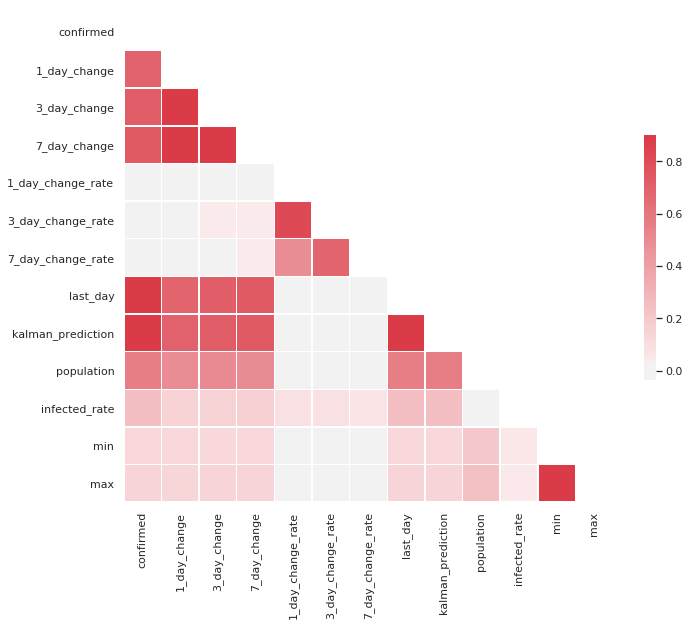

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.698012
3_day_change         0.723328
7_day_change         0.738164
1_day_change_rate    0.024023
3_day_change_rate    0.021724
7_day_change_rate    0.014185
last_day             0.994015
kalman_prediction    0.994237
population           0.563498
infected_rate        0.247574
min                  0.122833
max                  0.143668
Name: confirmed, dtype: float64


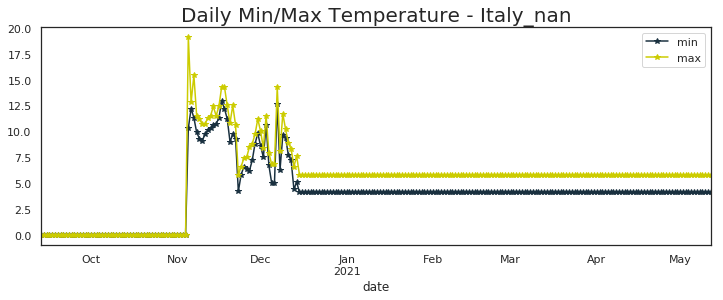

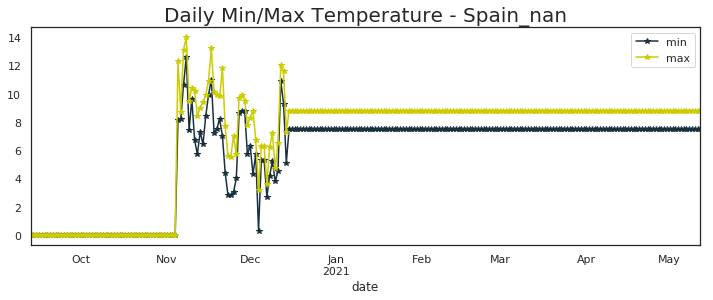

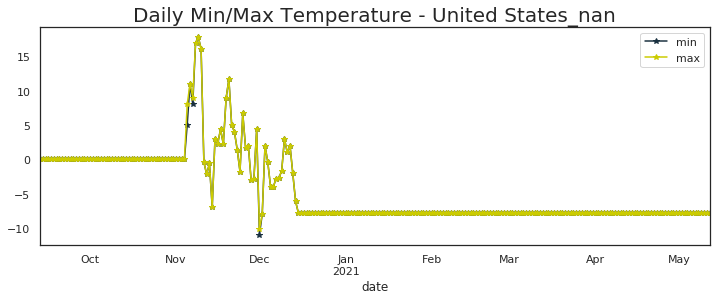

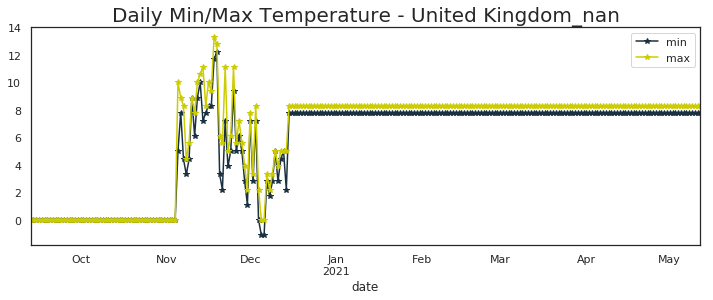

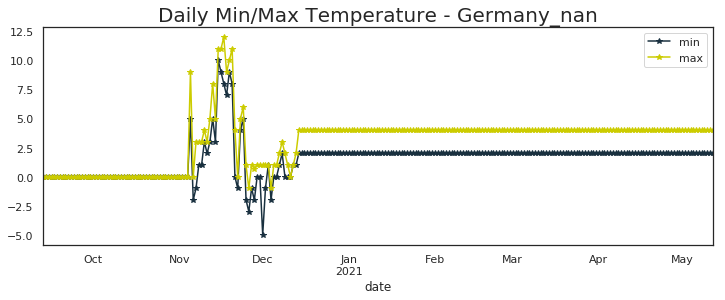

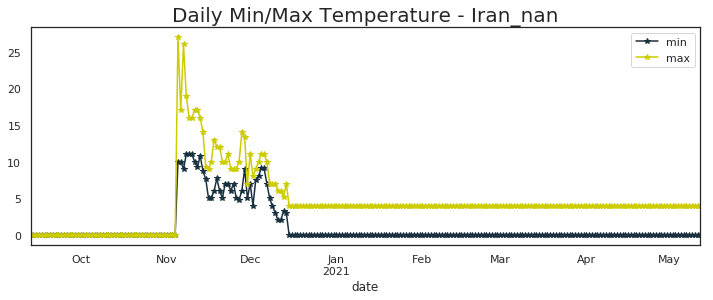

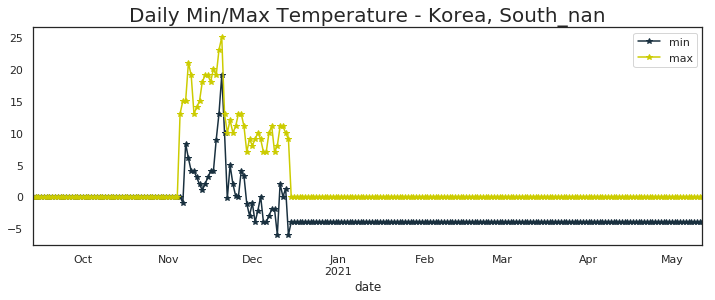

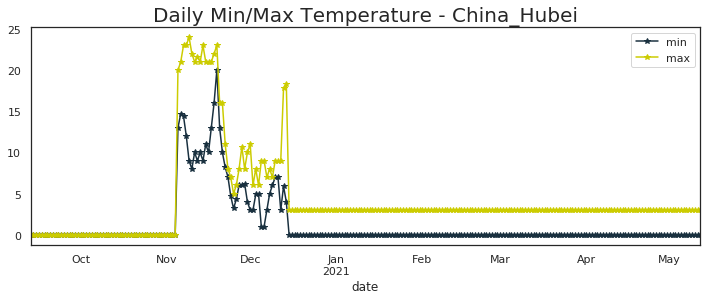

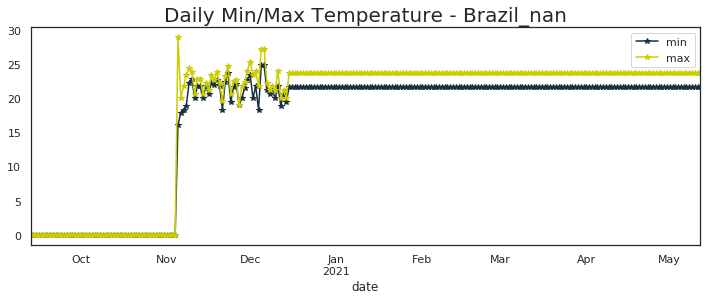

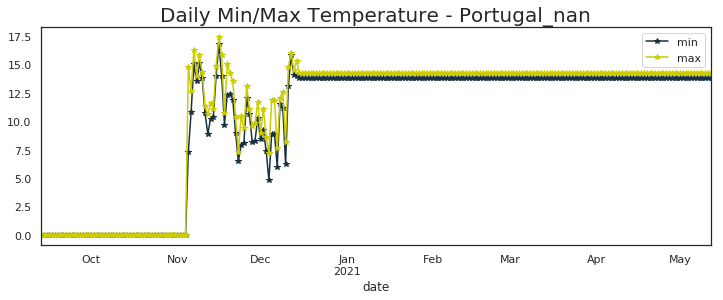

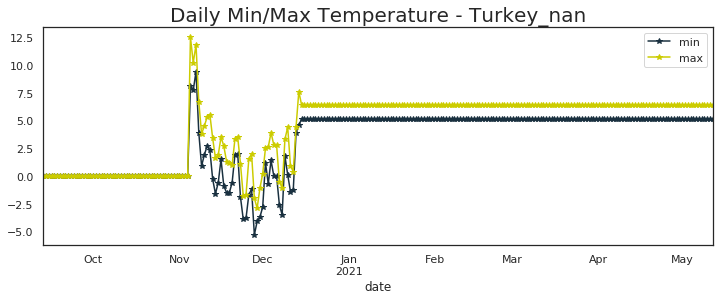

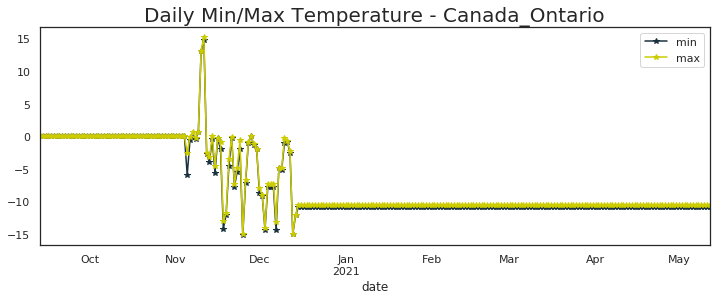

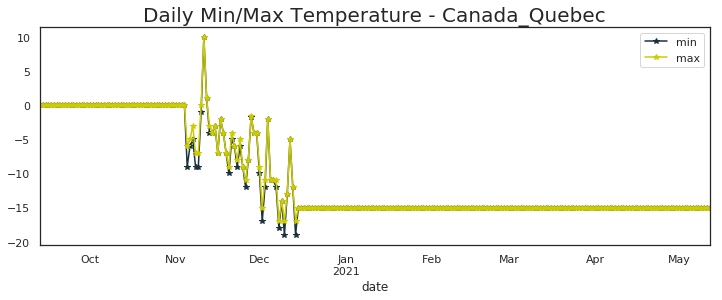

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Turkey_nan                   9.4  12.5
Russia_nan                   0.0   4.0
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
Mexico_nan                  15.1  15.1
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Iraq_nan                    

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

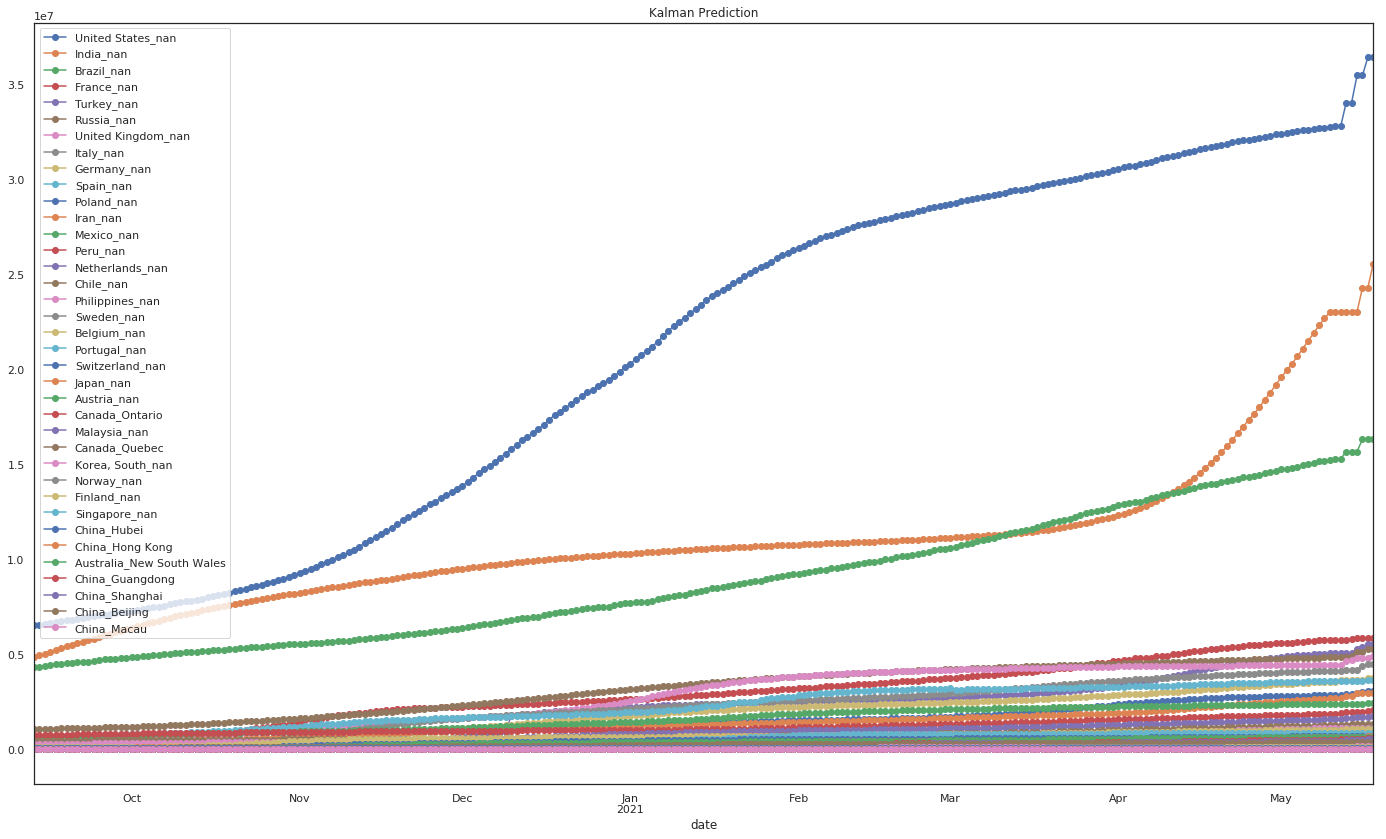

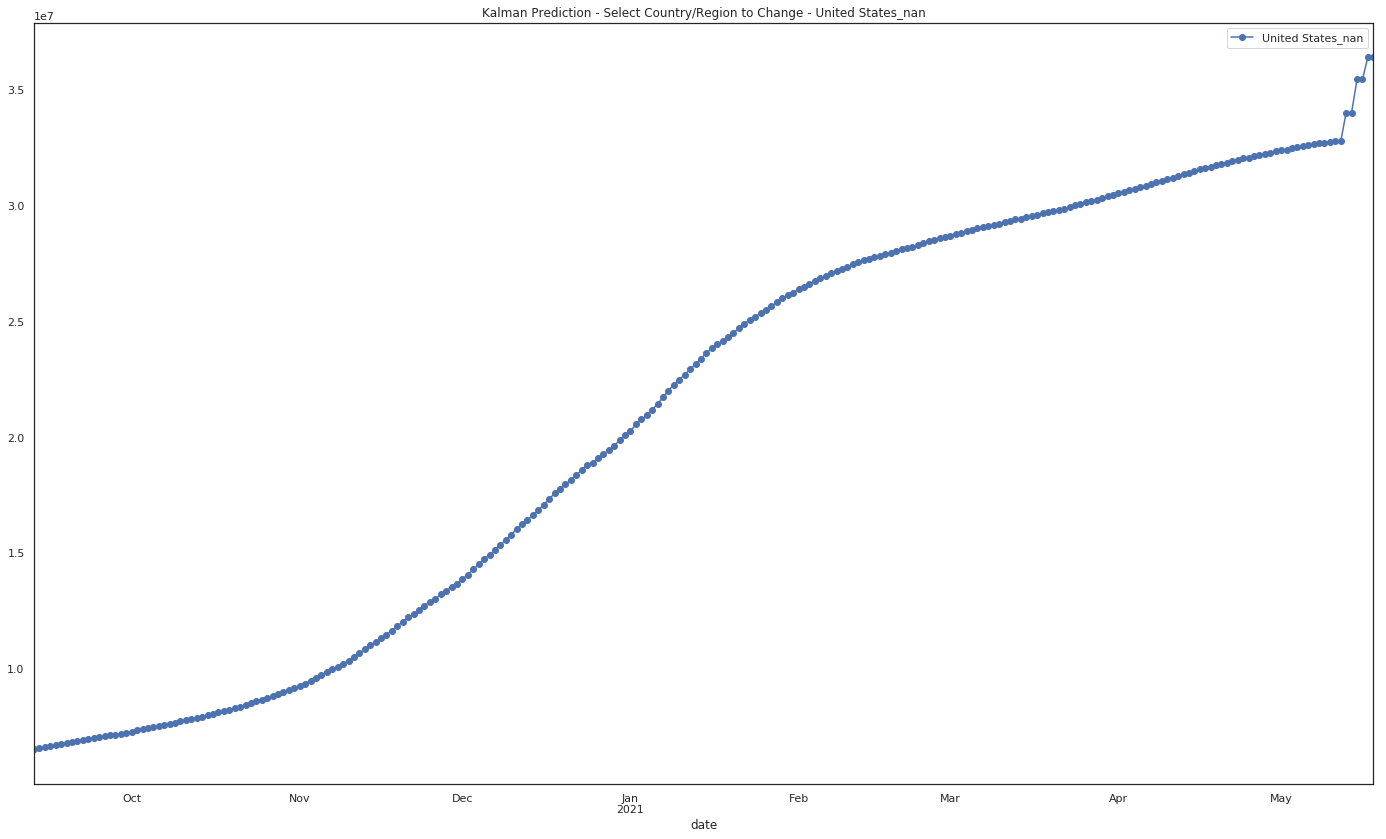

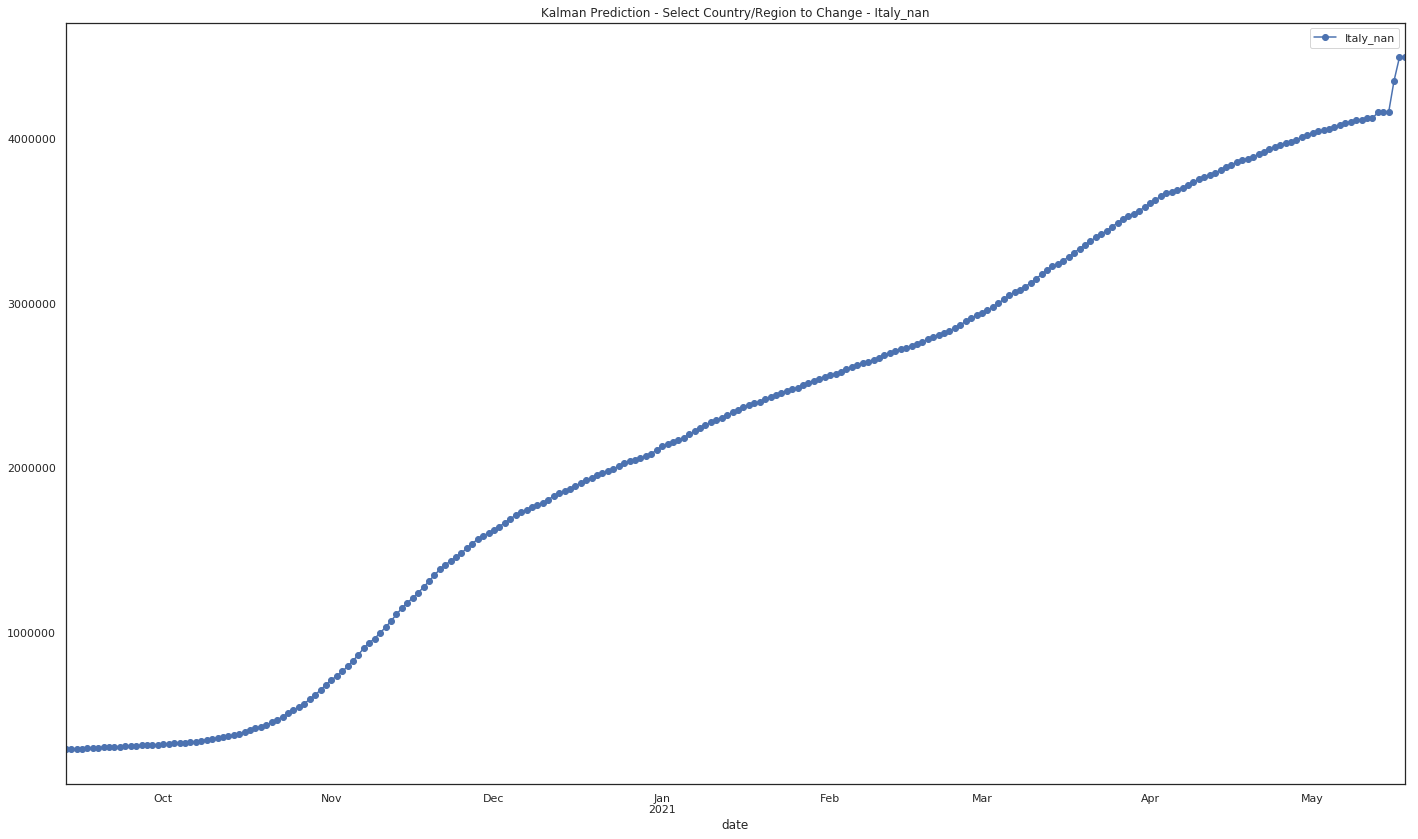

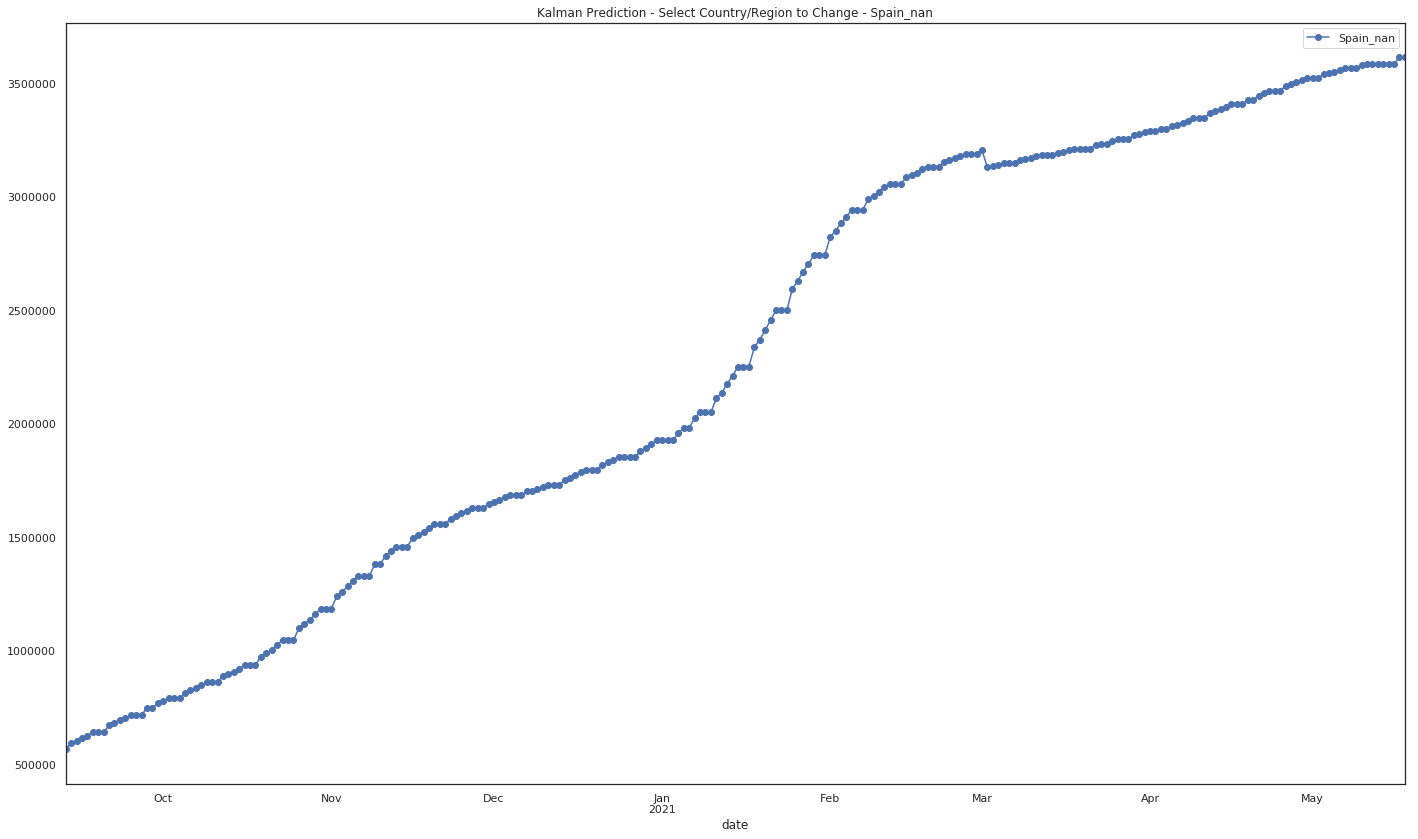

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


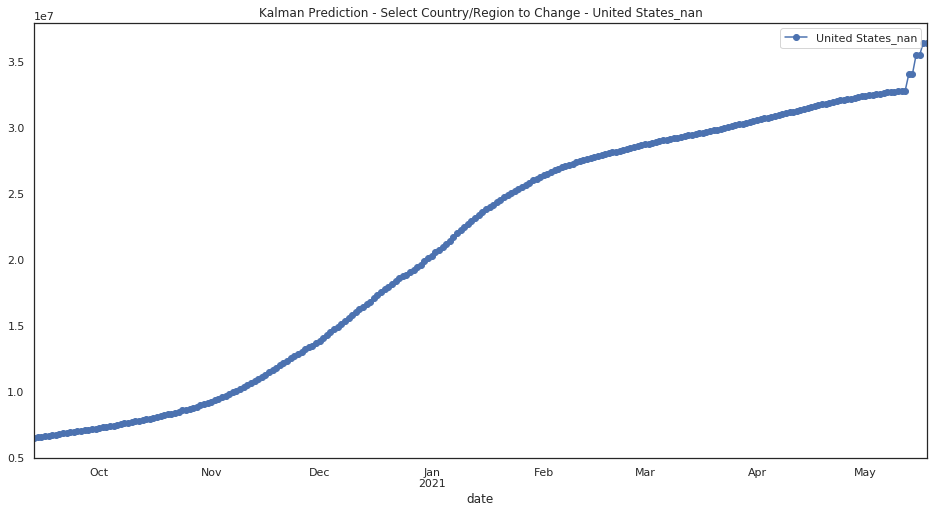

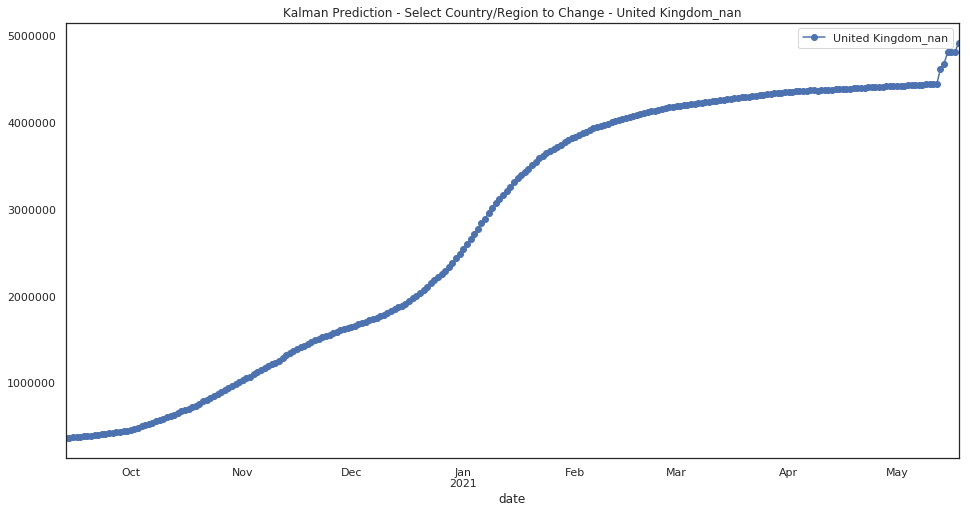

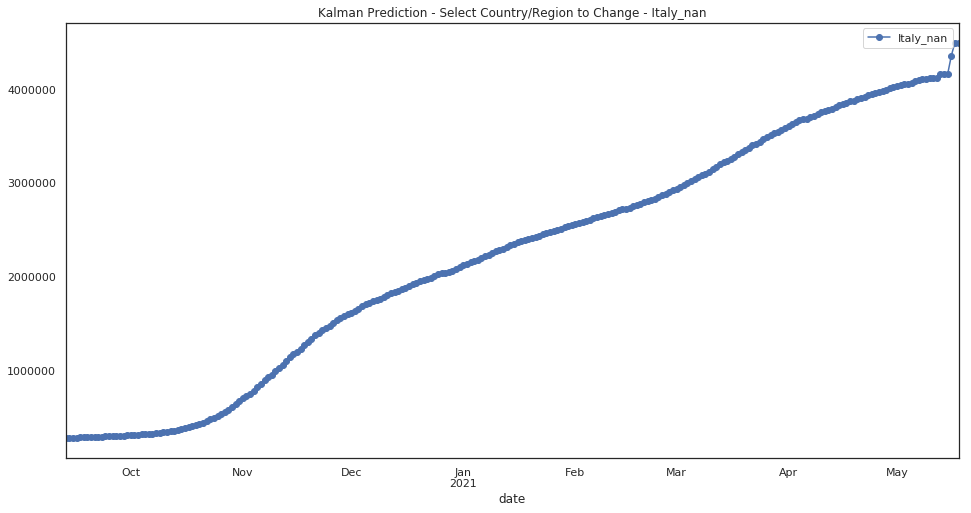

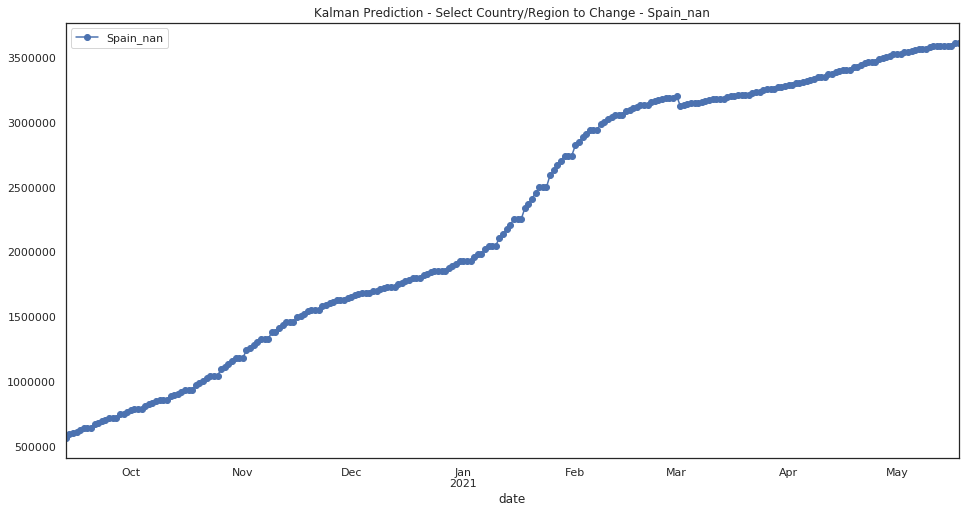

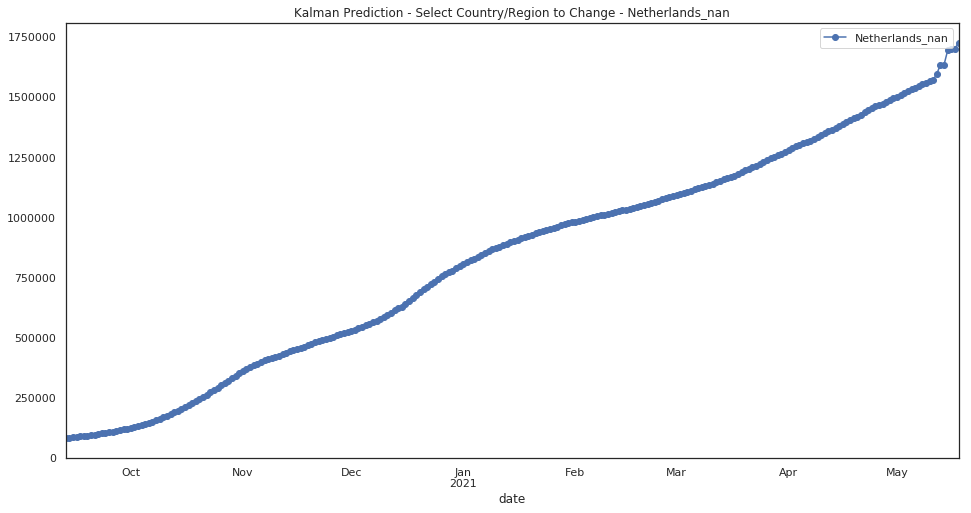

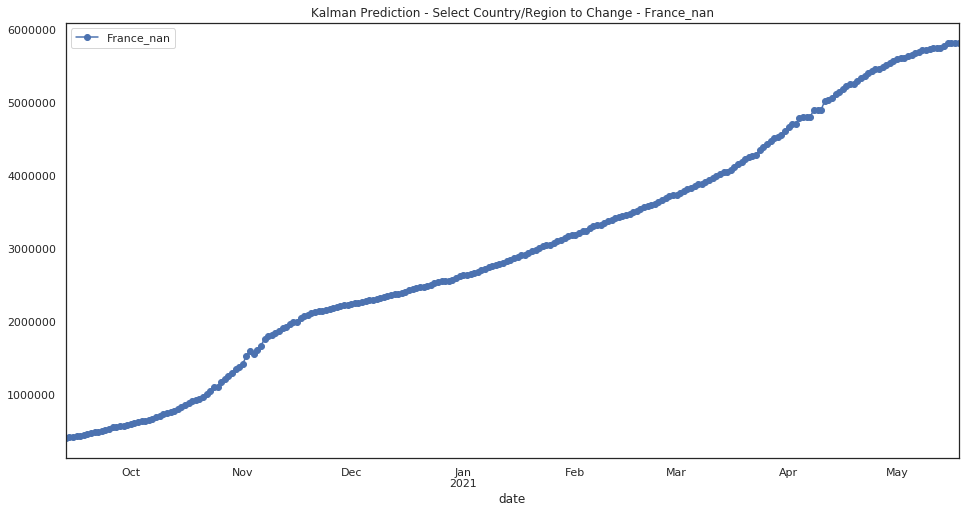

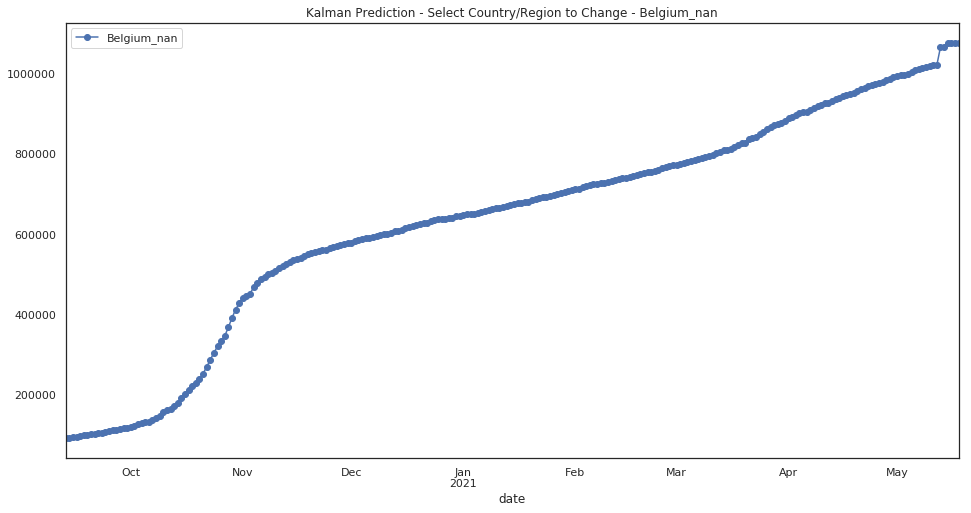

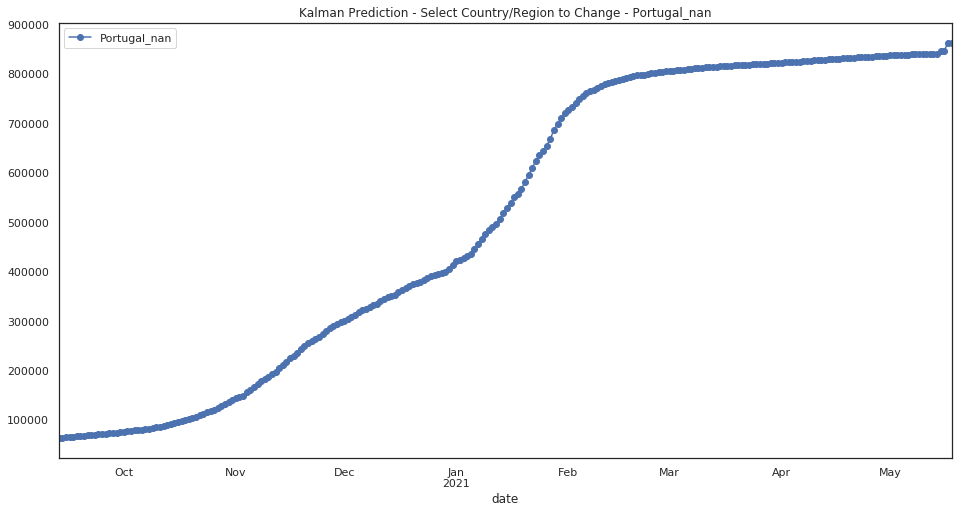

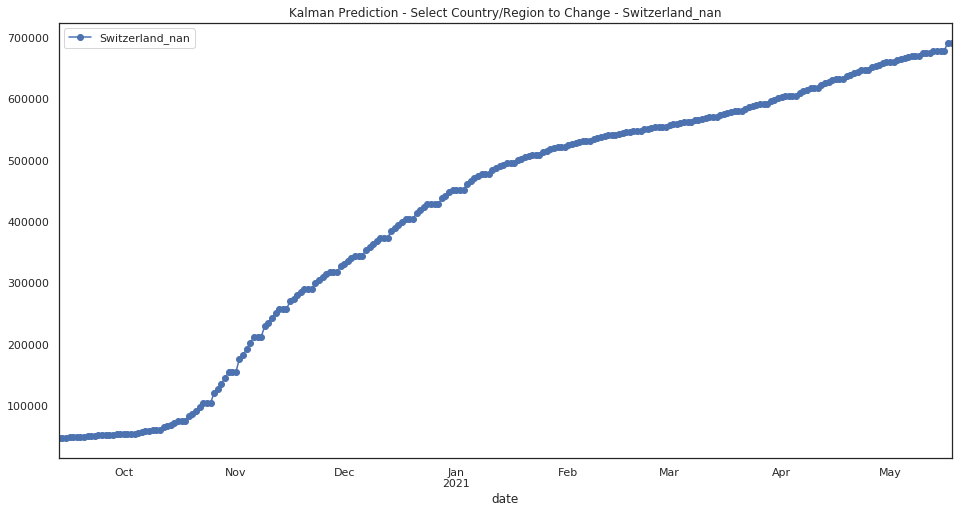

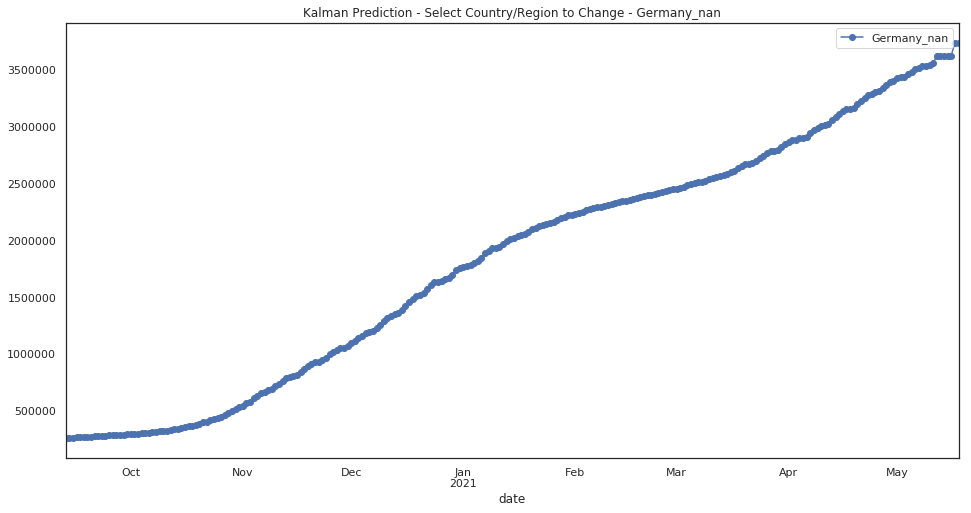

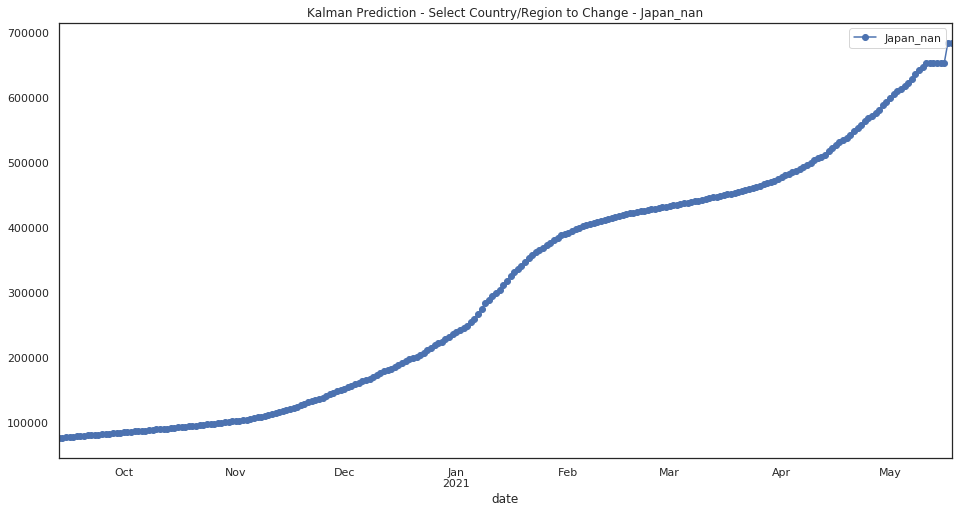

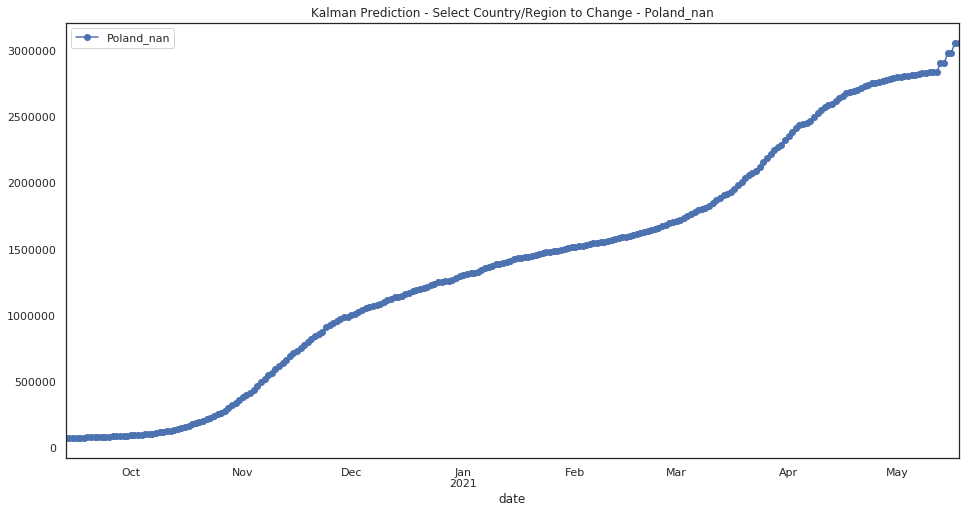

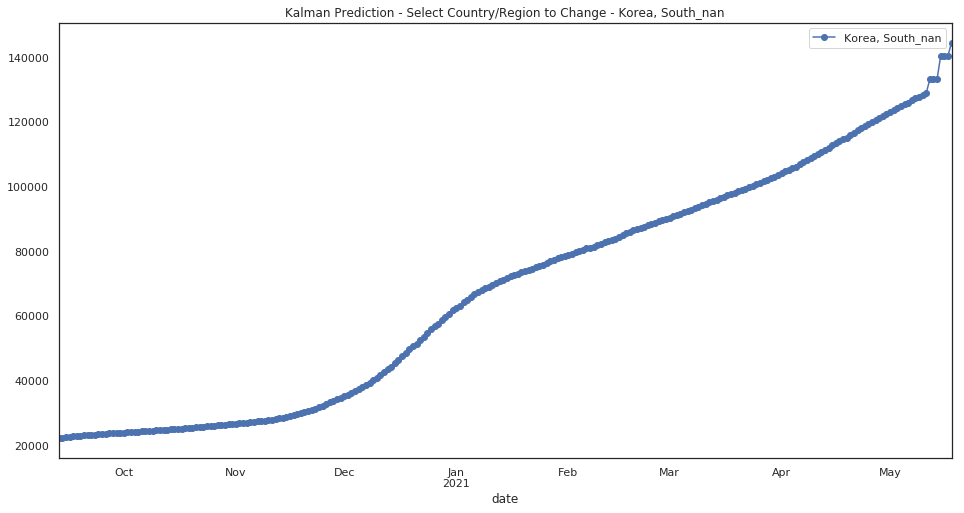

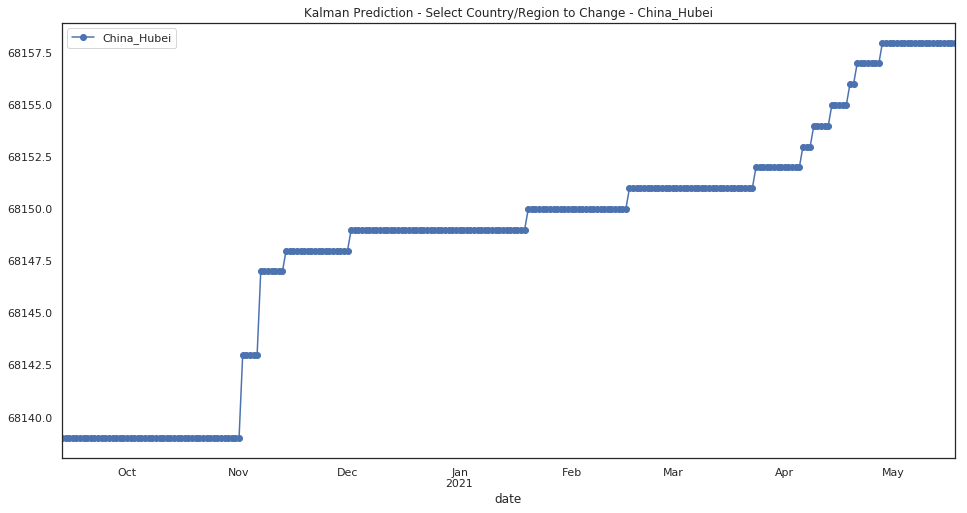

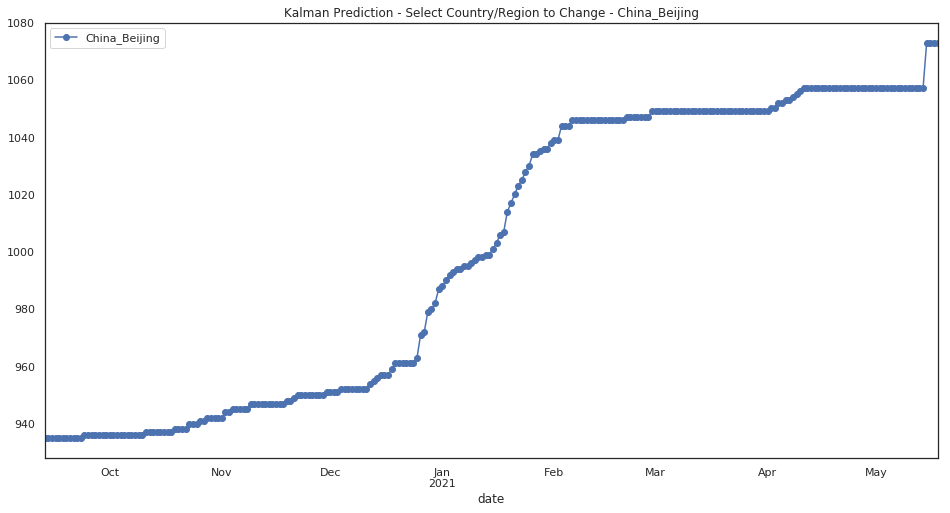

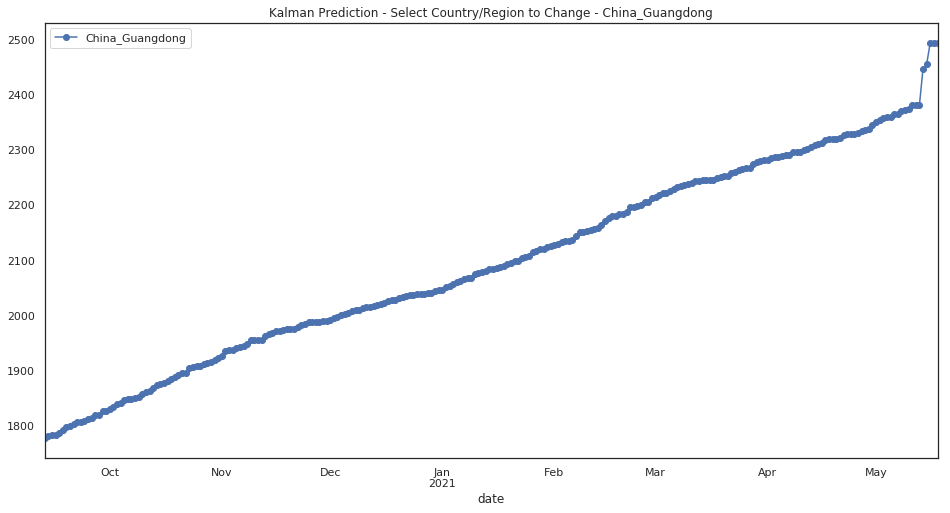

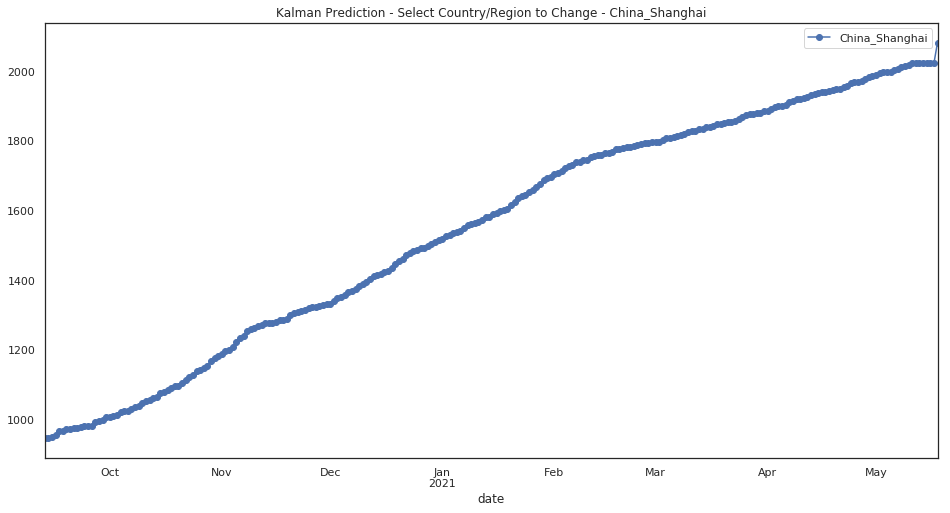

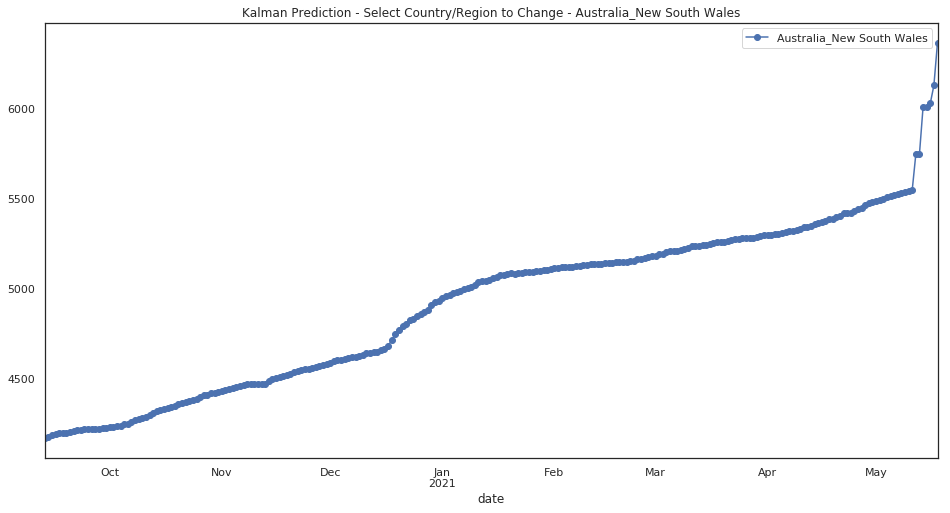

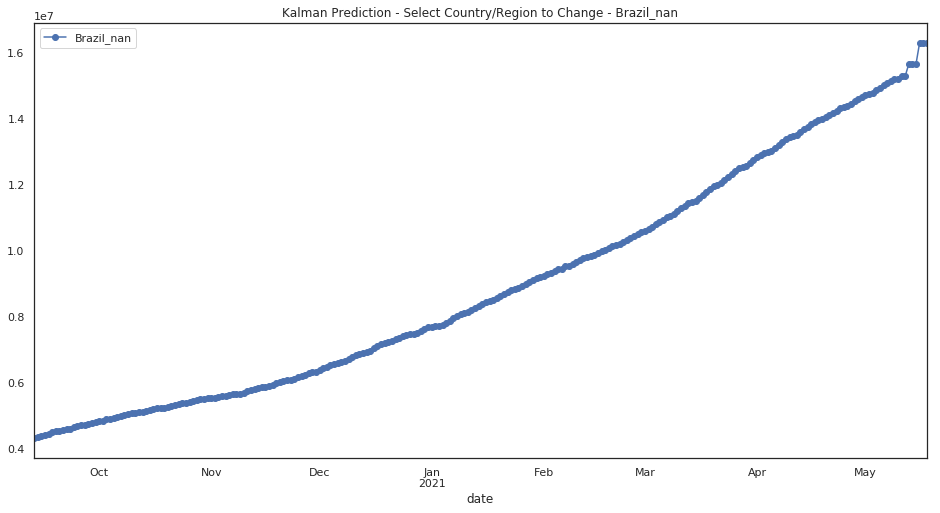

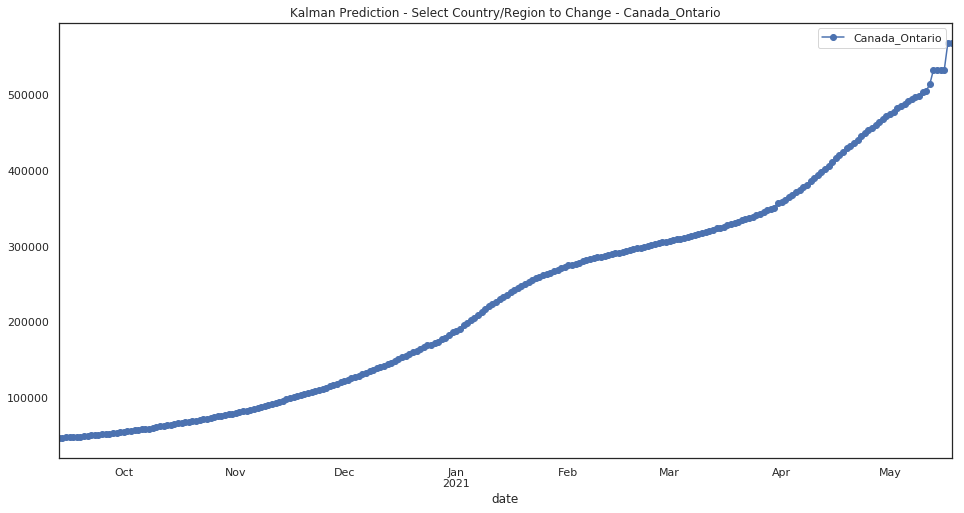

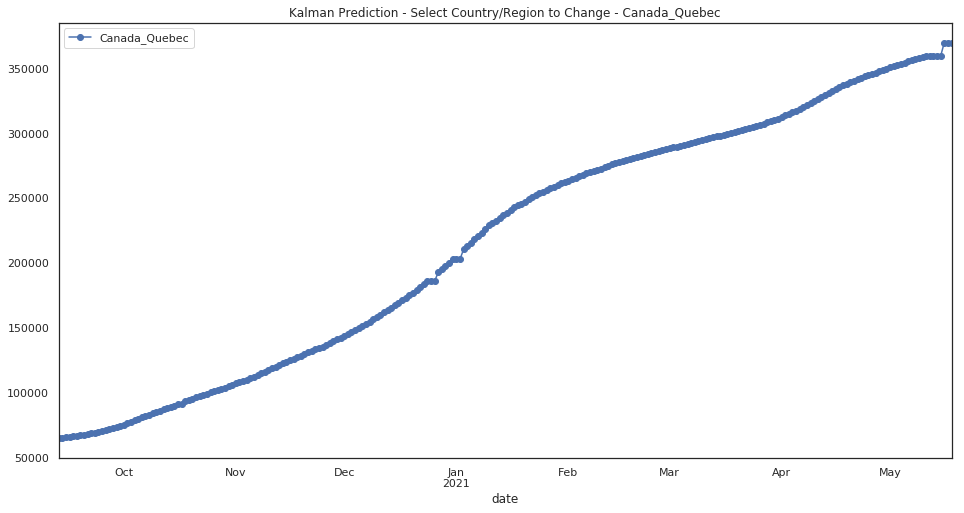

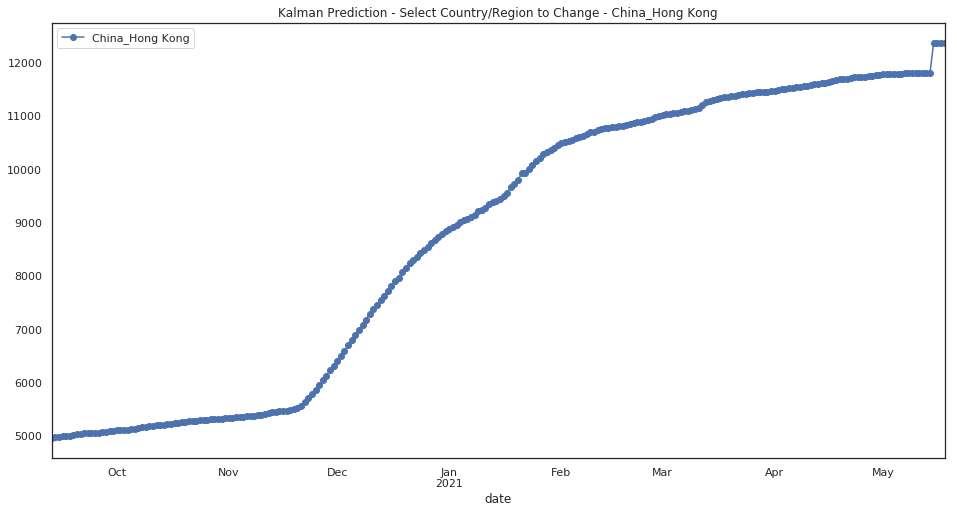

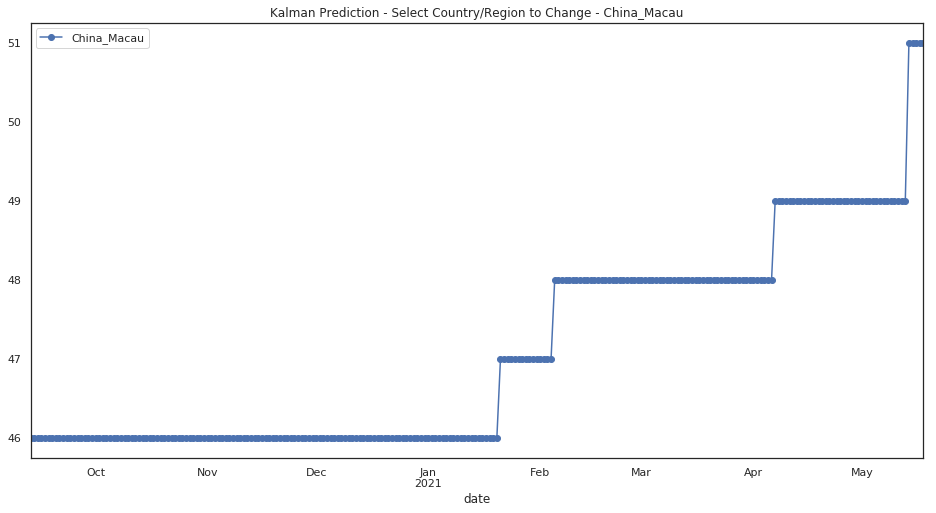

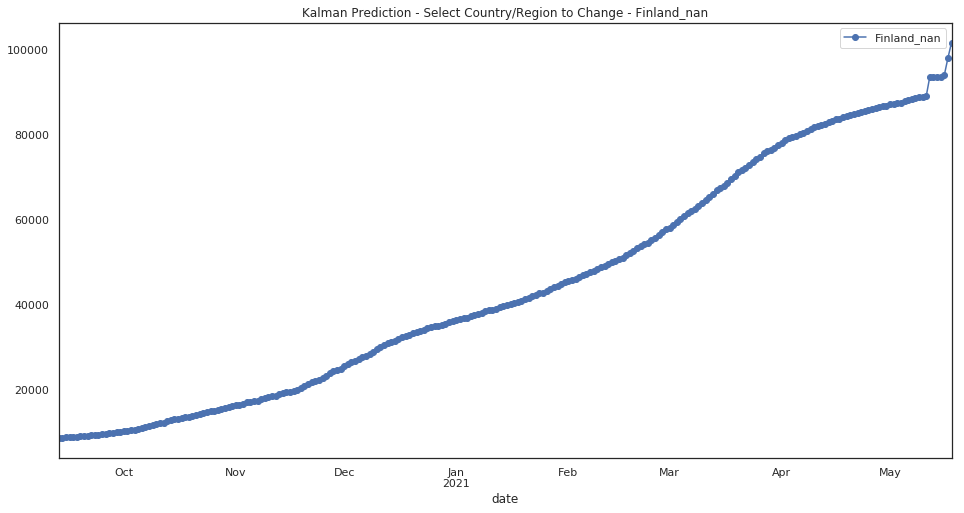

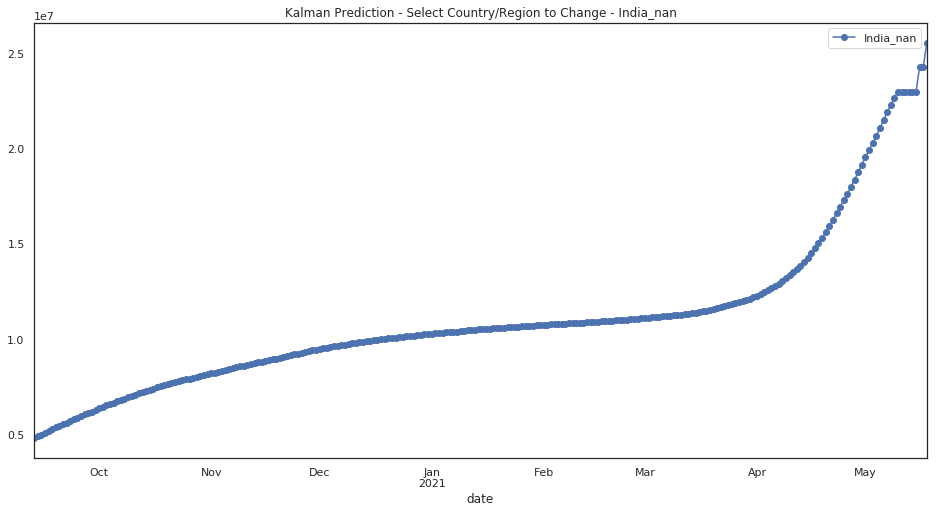

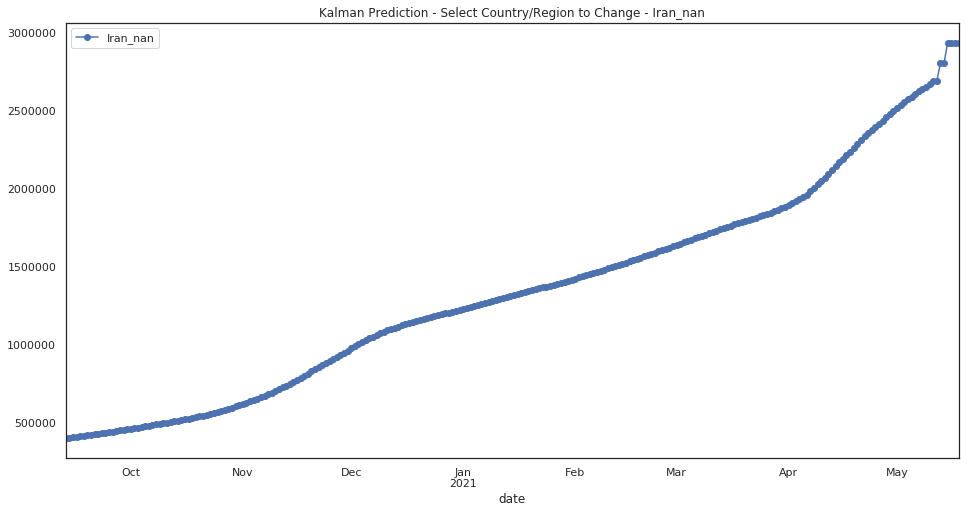

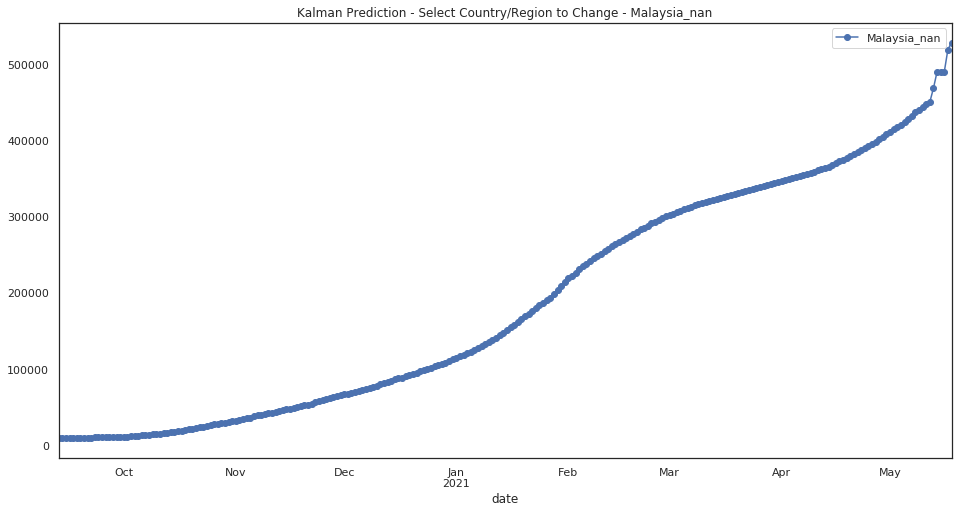

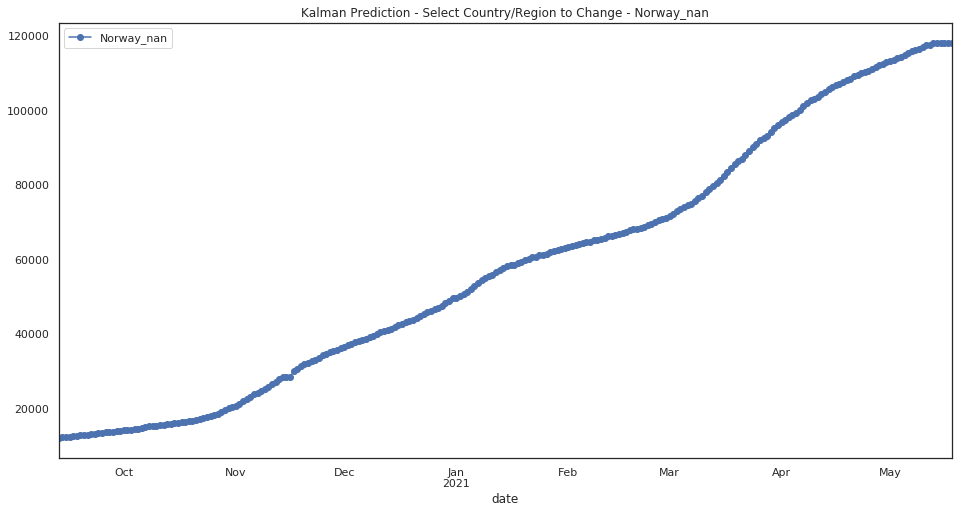

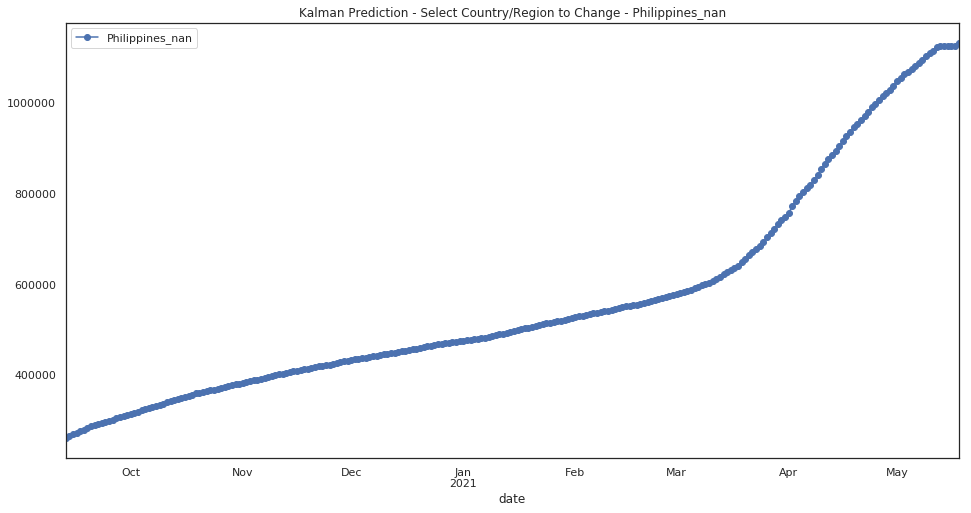

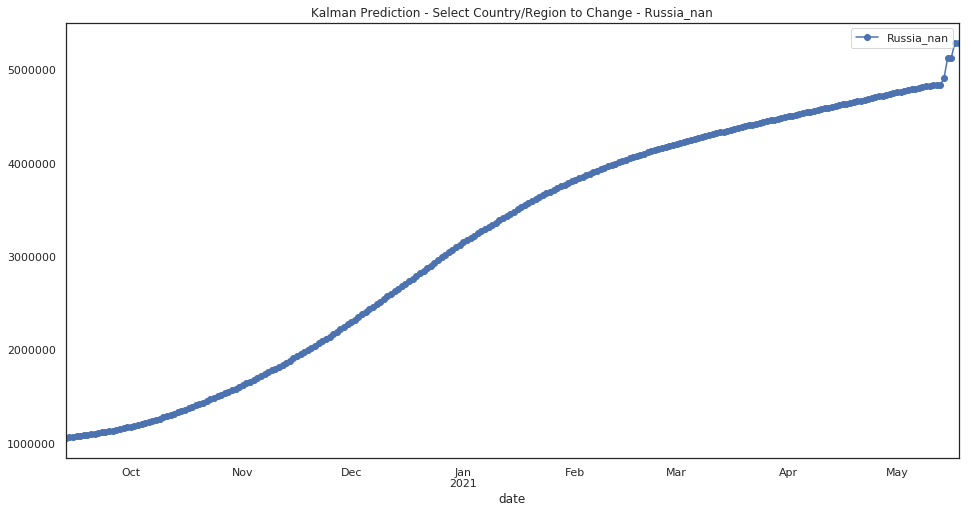

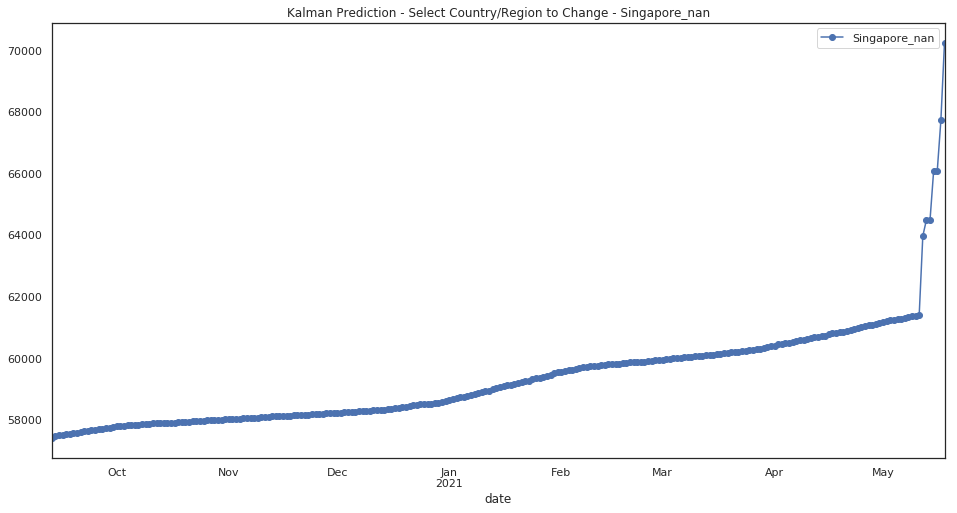

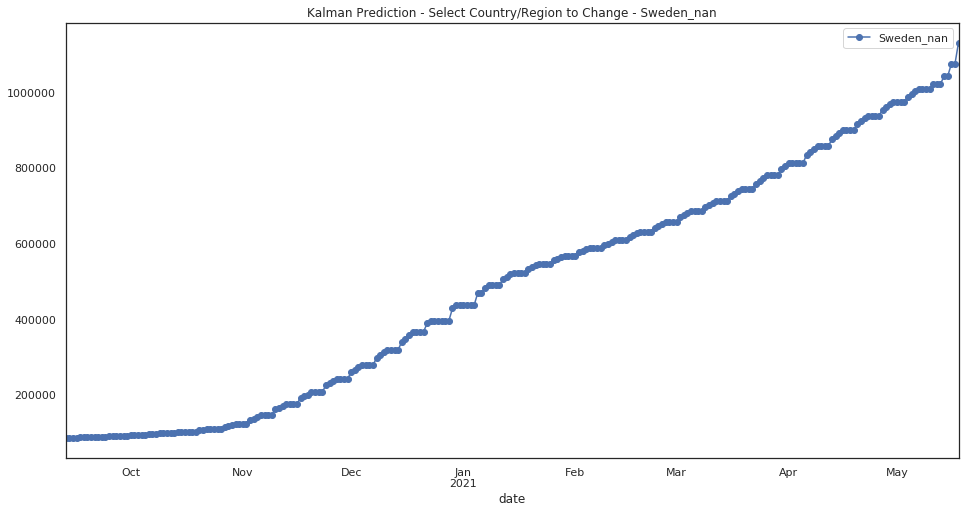

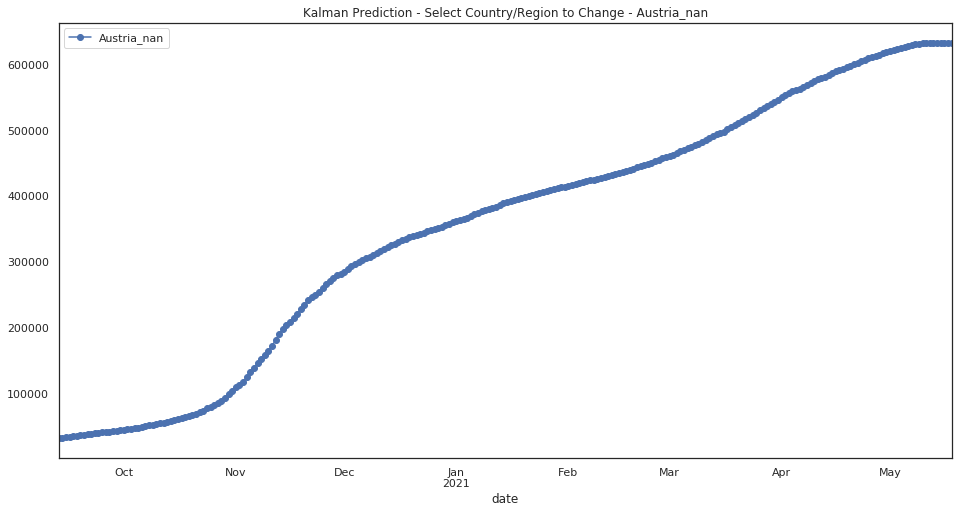

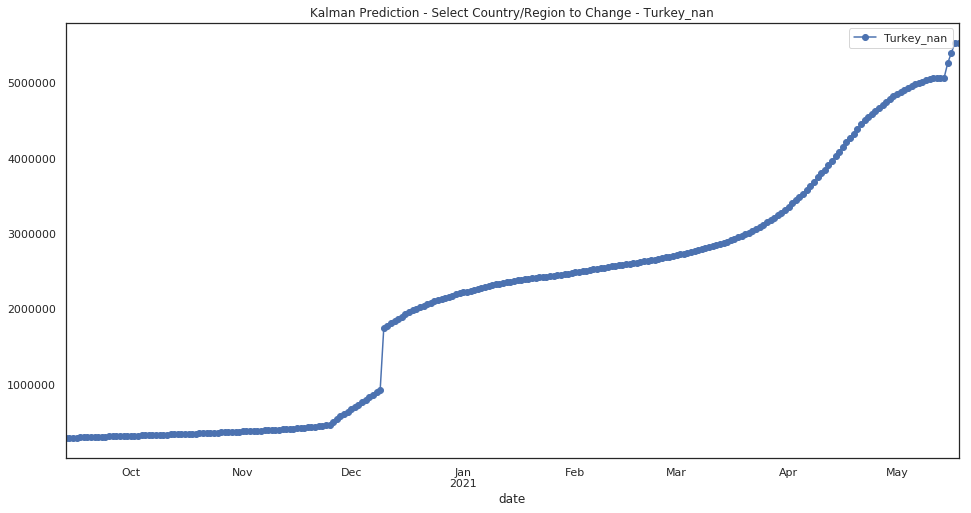

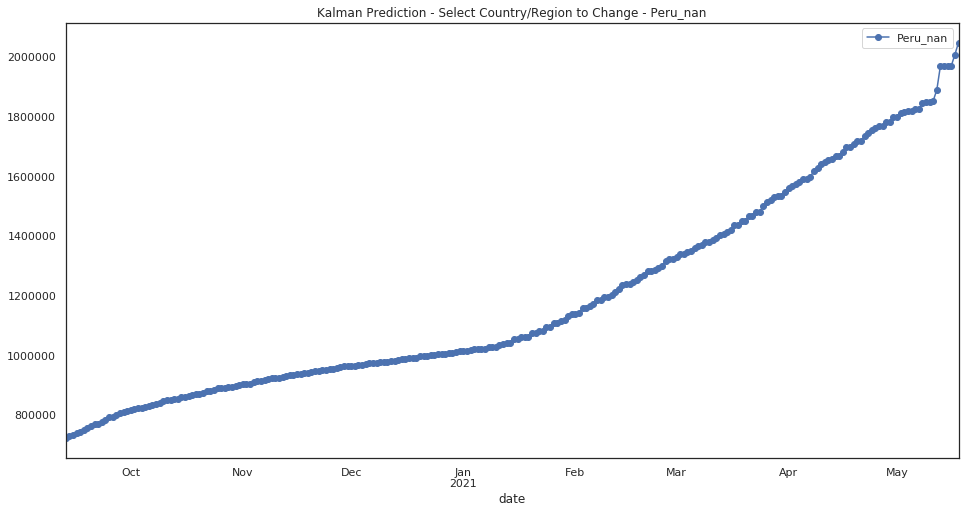

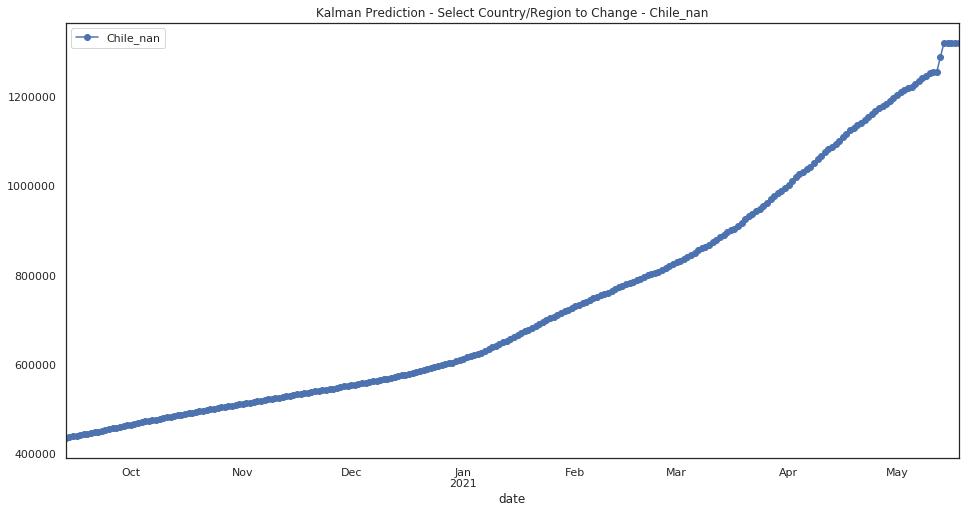

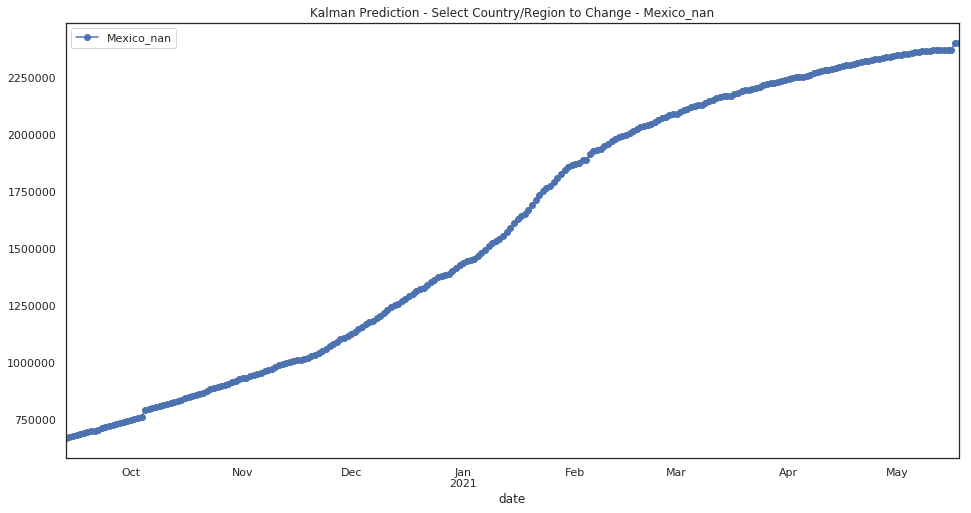

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-05-18 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      36410506.0
India_nan                                           NaN      25554615.0
Brazil_nan                                          NaN      16301230.0
France_nan                                          NaN       5822877.0
Turkey_nan                                          NaN       5532500.0
Russia_nan                                          NaN       5294136.0
United Kingdom_nan                                  NaN       4916921.0
Italy_nan                                           NaN       4495655.0
Germany_nan                                         NaN       3739250.0
Spain_nan                                           NaN       3615451.0
Argentina_nan                                       NaN       3515563.0
Colombia_nan                                        NaN       3289945.0
Poland_nan                                          NaN       3060398.0
Iran_nan                                            NaN       2937995.0
Mexico_nan                                          NaN       2402076.0
Ukraine_nan                                         NaN       2181022.0
Peru_nan                                            NaN       2048514.0
South Africa_nan                                    NaN       1833836.0
Indonesia_nan                                       NaN       1802713.0
Netherlands_nan                                     NaN       1726658.0
Czechia_nan                                         NaN       1679764.0
Chile_nan                                           NaN       1322020.0
Romania_nan                                         NaN       1215307.0
Iraq_nan                                            NaN       1193819.0
Philippines_nan                                     NaN       1132176.0
Sweden_nan                                          NaN       1131136.0
Belgium_nan                                         NaN       1076608.0
Hungary_nan                                         NaN        953419.0
Pakistan_nan                                        NaN        911212.0
Israel_nan                                          NaN        873426.0
...                                                 ...             ...
Grenada_nan                                         NaN           178.0
Dominica_nan                                        NaN           176.0
Australia_Northern Territory                        NaN           167.0
Canada_Northwest Territories                        NaN           151.0
China_Guizhou                                       NaN           149.0
Australia_Australian Capital Territory              NaN           127.0
France_New Caledonia                                NaN           124.0
United Kingdom_Anguilla                             NaN           114.0
Canada_Yukon                                        NaN            87.0
China_Ningxia                                       NaN            84.0
United Kingdom_Falkland Islands (Malvinas)          NaN            68.0
China_Macau                                         NaN            51.0
Saint Kitts and Nevis_nan                           NaN            49.0
Denmark_Greenland                                   NaN            33.0
Holy See_nan                                        NaN            28.0
France_Saint Pierre and Miquelon                    NaN            25.0
Solomon Islands_nan                                 NaN            21.0
China_Qinghai                                       NaN            20.0
United Kingdom_Montserrat                           NaN            20.0
Canada_Grand Princess                               NaN            14.0
Canada_Repatriated Travellers                       NaN            13.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Vanuatu_nan                                         NaN             4.0
Marshall Islands_nan  

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          50574.0      26970.0      58801.0      18336.0   
2020-09-14          50622.0      27114.0      59010.0      18418.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48988.0       1483.0   
2020-09-18          38872.0      11948.0      49207.0       1483.0   
2020-09-19          38897.0      12073.0      49416.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39215.0      12531.0      50116.0       1894.0   
2020-09-22          39236.0      12681.0      50308.0       1681.0   
2020-09-23          39283.0      12820.0      50496.0       2000.0   
2020-09-24          39304.0      12957.0      50677.0       1753.0   
2020-09-25          39320.0      13068.0      50853.0       2031.0   
2020-09-26          39327.0      13187.0      51016.0       1836.0   
2020-09-27          39354.0      13309.0      51169.0       2043.0   
2020-09-28          39378.0      13437.0      51316.0       2155.0   
2020-09-29          39392.0      13543.0      51470.0       1966.0   
2020-09-30          39407.0      13683.0      51634.0       2275.0   
2020-10-01          39424.0      13837.0      51798.0       2050.0   
2020-10-02          39432.0      13978.0      51958.0       2288.0   
2020-10-03          39438.0      14134.0      52108.0       2110.0   
2020-10-04          39476.0      14293.0      52248.0       2265.0   
2020-10-05          39556.0      14438.0      52381.0       2490.0   
2020-10-06          39627.0      14596.0      52509.0       2370.0   
2020-10-07          39690.0      14747.0      52630.0       2853.0   
2020-10-08          39756.0      14914.0      52766.0       2568.0   
2020-10-09          39827.0      15080.0      52915.0       2929.0   
2020-10-10          39843.0      15249.0      53056.0       2696.0   
2020-10-11          39919.0      15419.0      53189.0       2891.0   
2020-10-12          39997.0      15588.0      53425.0       3148.0   
...                     ...          ...          ...          ...   
2021-04-20          58156.0     129779.0     120096.0      12805.0   
2021-04-21          58336.0     129943.0     120287.0      12874.0   
2021-04-22          58458.0     130079.0     120474.0      12917.0   
2021-04-23          58649.0     130235.0     120675.0      12942.0   
2021-04-24          58867.0     130386.0     120855.0      13007.0   
2021-04-25          58977.0     130510.0     121029.0      13024.0   
2021-04-26          59124.0     130583.0     121220.0      13060.0   
2021-04-27          59332.0     130678.0     121445.0      13083.0   
2021-04-28          59490.0     130826.0     121697.0      13121.0   
2021-04-29          59679.0     130943.0     121977.0      13148.0   
2021-04-30          59862.0     131055.0     122243.0      13198.0   
2021-05-01          60045.0     131154.0     122433.0      13232.0   
2021-05-02          60239.0     131211.0     122624.0      13232.0   
2021-05-03          60408.0     131238.0     122817.0      13282.0   
2021-05-04          60659.0     131276.0     123078.0      13295.0   
2021-05-05          60917.0     131369.0     123386.0      13316.0   
2021-05-06          61256.0     131481.0     123595.0      13340.0   
2021-05-07          61591.0     131556.0     123791.0      13363.0   
2021-05-08          61869.0     131637.0     124005.0      13390.0   
2021-05-09          61985.0     131707.0     124200.0      13406.0   
2021-05-10          62125.0     131726.0     124386.0      13423.0   
2021-05-11          62470.0     131761.0     124571.0      13429.0   
2021-05-12          62541.0     131803.0     124607.0      13449.0   
2021-05-13          63373.0     131803.0     124540.0      13955.0   
2021-05-14

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'India_nan',
 'Brazil_nan',
 'France_nan',
 'Turkey_nan',
 'Russia_nan',
 'United Kingdom_nan',
 'Italy_nan',
 'Germany_nan',
 'Spain_nan',
 'Argentina_nan',
 'Colombia_nan',
 'Poland_nan',
 'Iran_nan',
 'Mexico_nan',
 'Ukraine_nan',
 'Peru_nan',
 'South Africa_nan',
 'Indonesia_nan',
 'Netherlands_nan',
 'Czechia_nan',
 'Chile_nan',
 'Romania_nan',
 'Iraq_nan',
 'Philippines_nan',
 'Sweden_nan',
 'Belgium_nan',
 'Hungary_nan',
 'Pakistan_nan',
 'Israel_nan',
 'Portugal_nan',
 'Bangladesh_nan',
 'Serbia_nan',
 'Jordan_nan',
 'Switzerland_nan',
 'Japan_nan',
 'Austria_nan',
 'United Arab Emirates_nan',
 'Canada_Ontario',
 'Lebanon_nan',
 'Morocco_nan',
 'Malaysia_nan',
 'Bulgaria_nan',
 'Nepal_nan',
 'Saudi Arabia_nan',
 'Belarus_nan',
 'Ecuador_nan',
 'Kazakhstan_nan',
 'Slovakia_nan',
 'Panama_nan',
 'Croatia_nan',
 'Greece_nan',
 'Canada_Quebec',
 'Bolivia_nan',
 'Azerbaijan_nan',
 'Tunisia_nan',
 'Georgia_nan',
 'Paraguay_nan',
 'West Bank and Gaza_nan',
 'Kuw

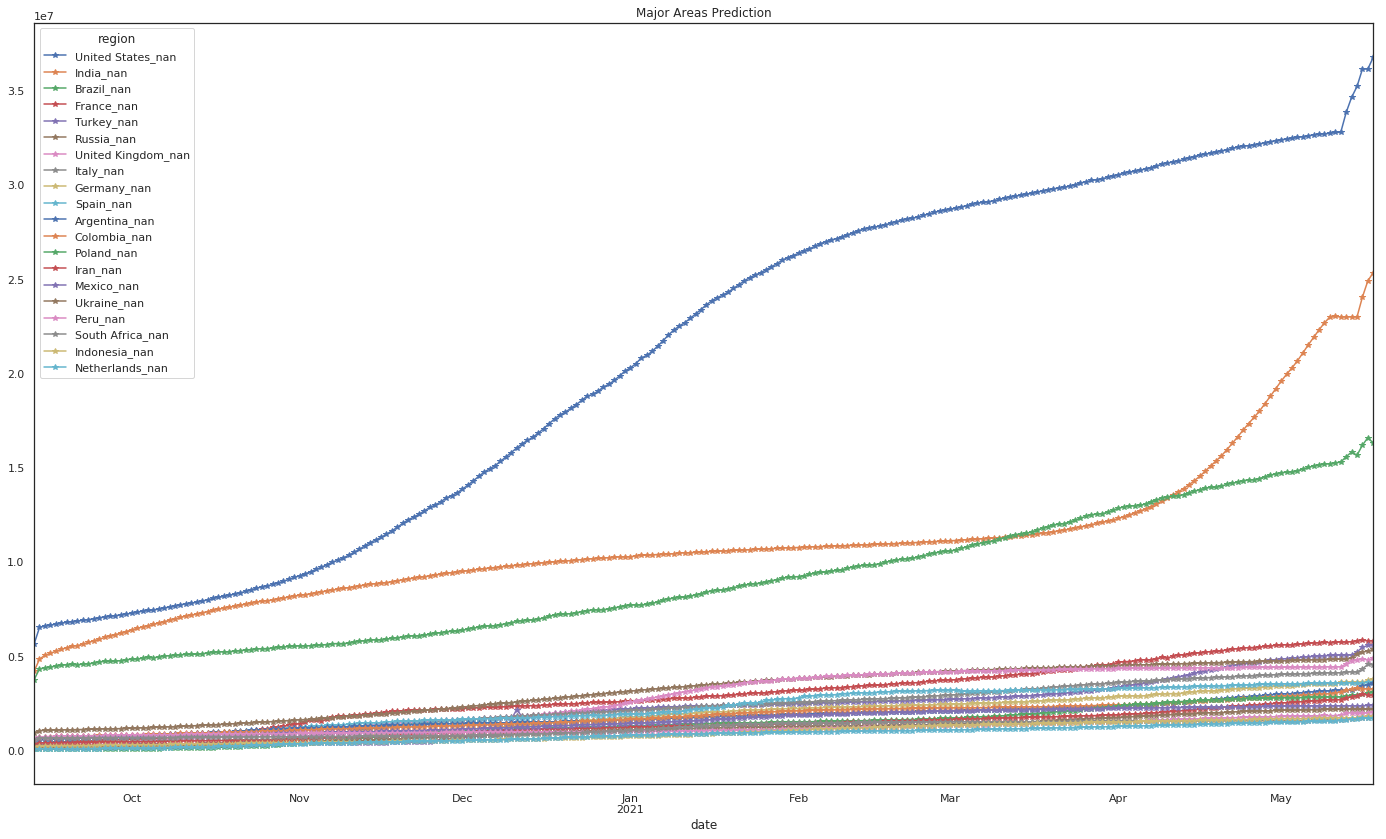

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

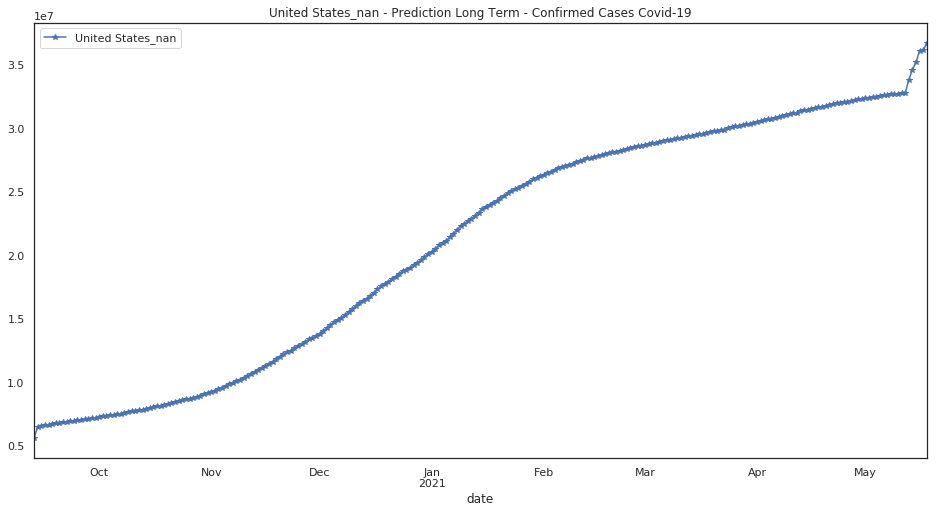

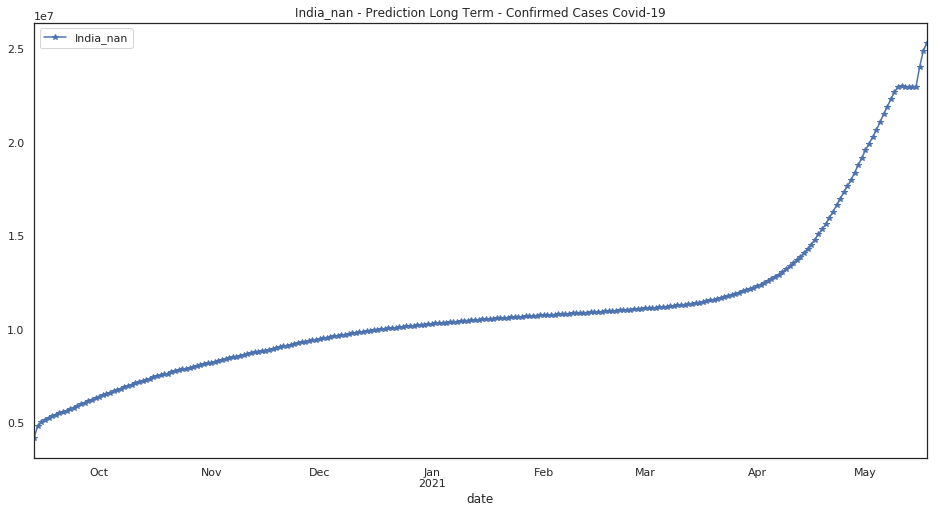

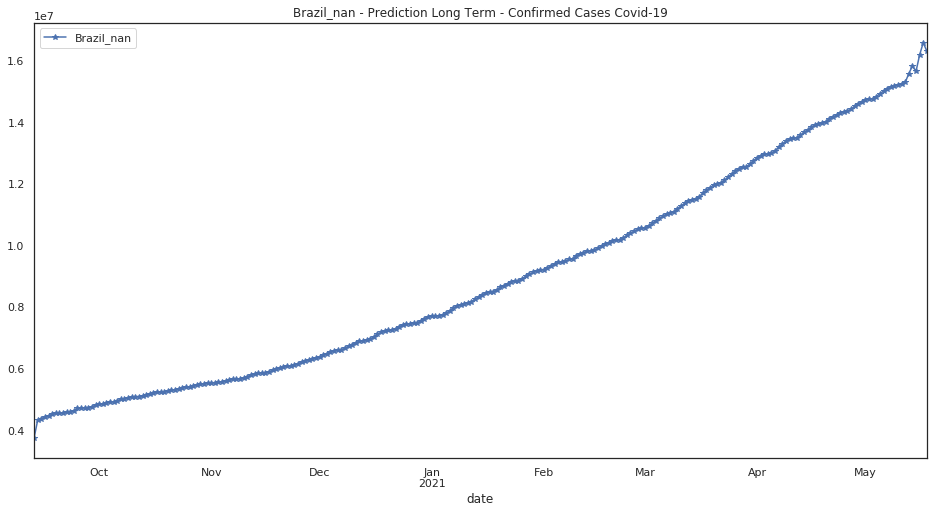

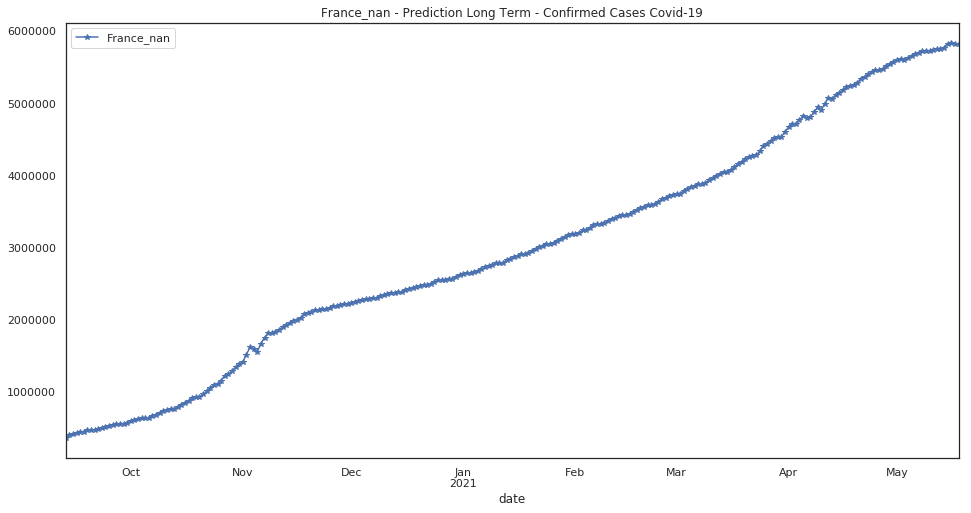

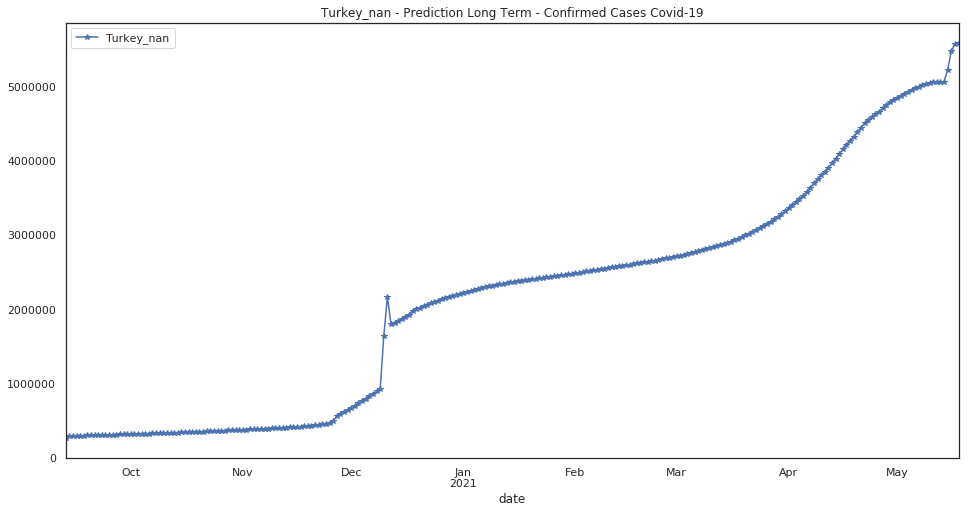

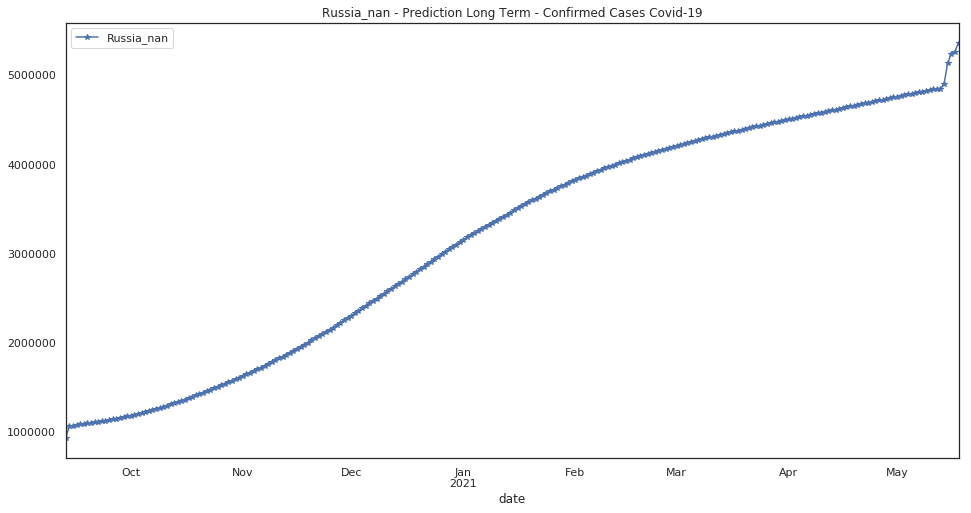

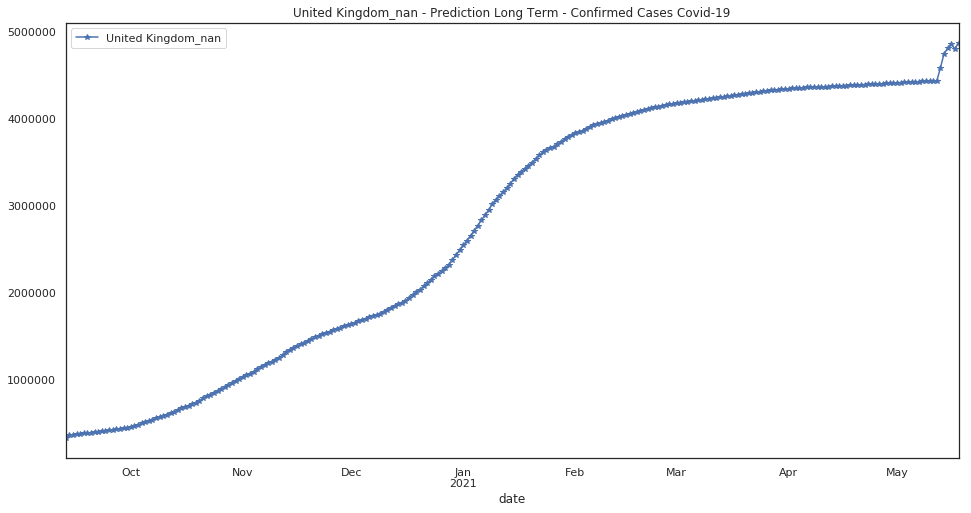

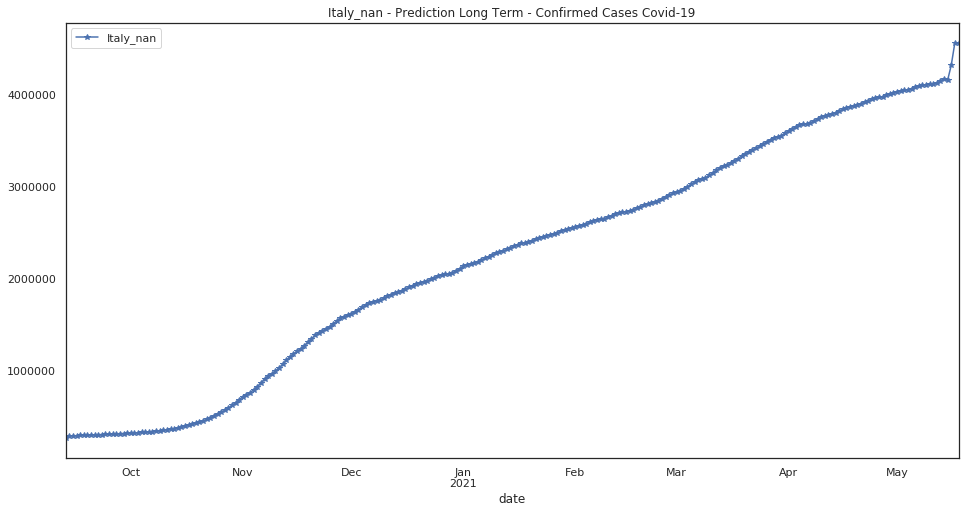

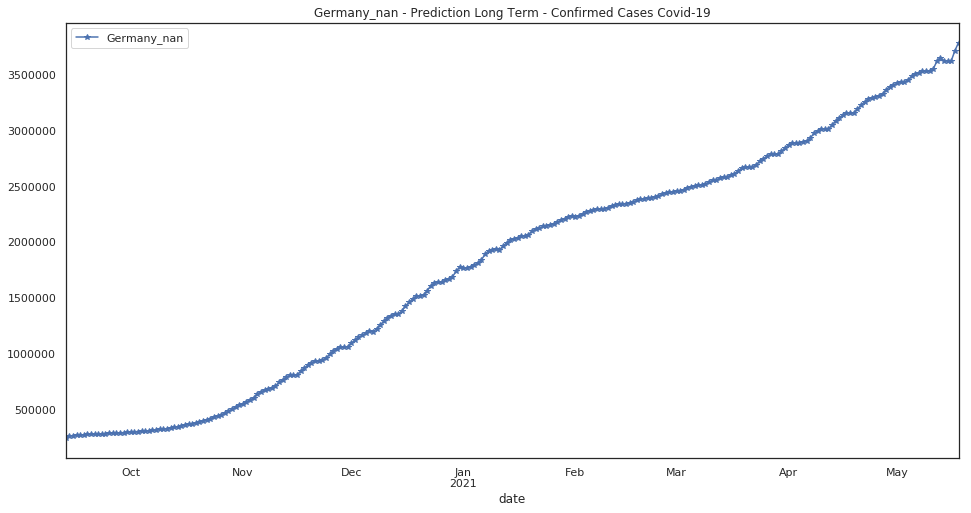

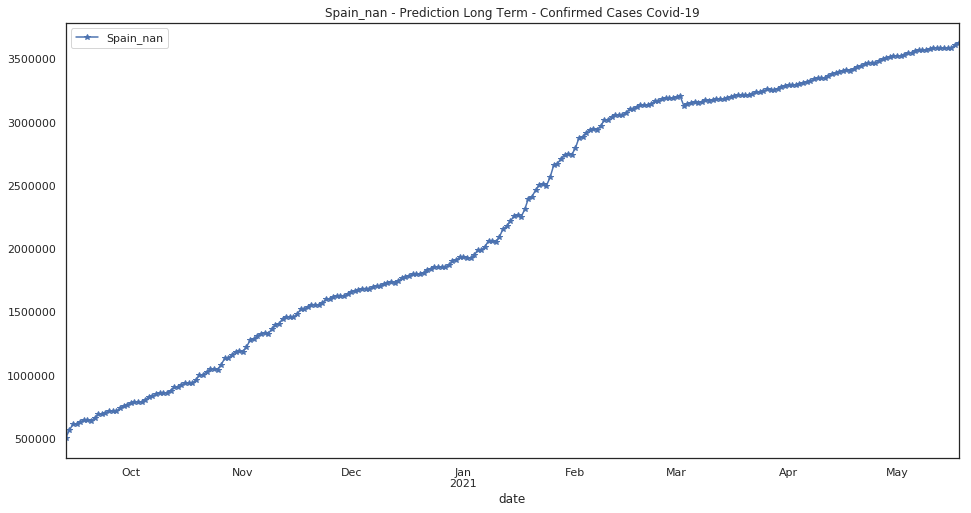

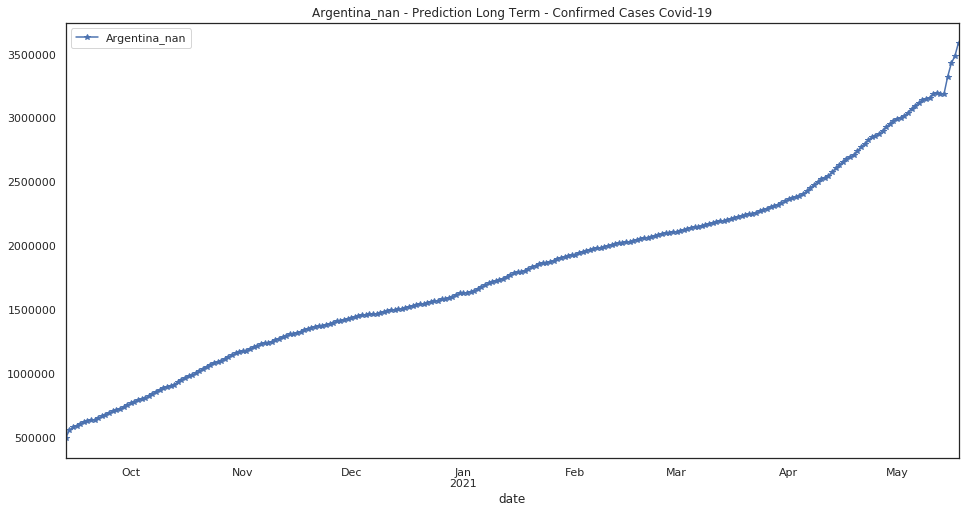

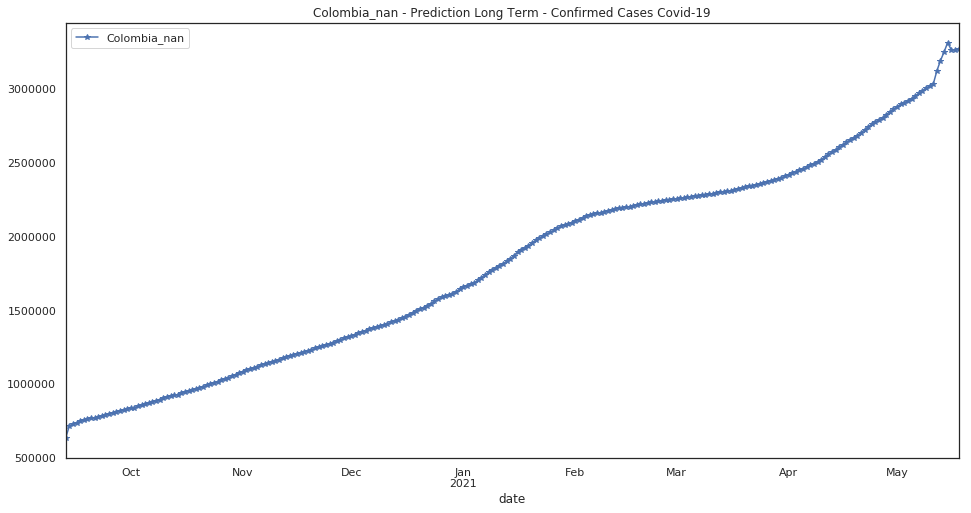

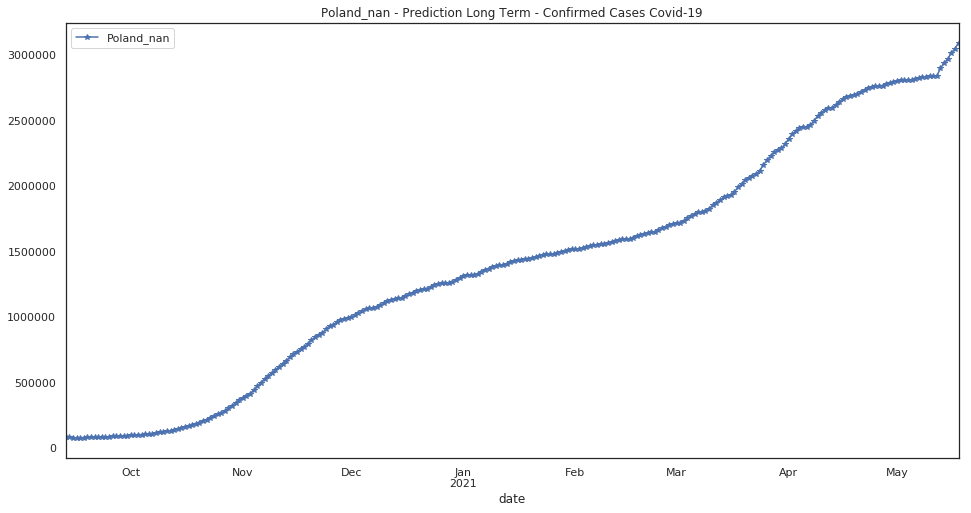

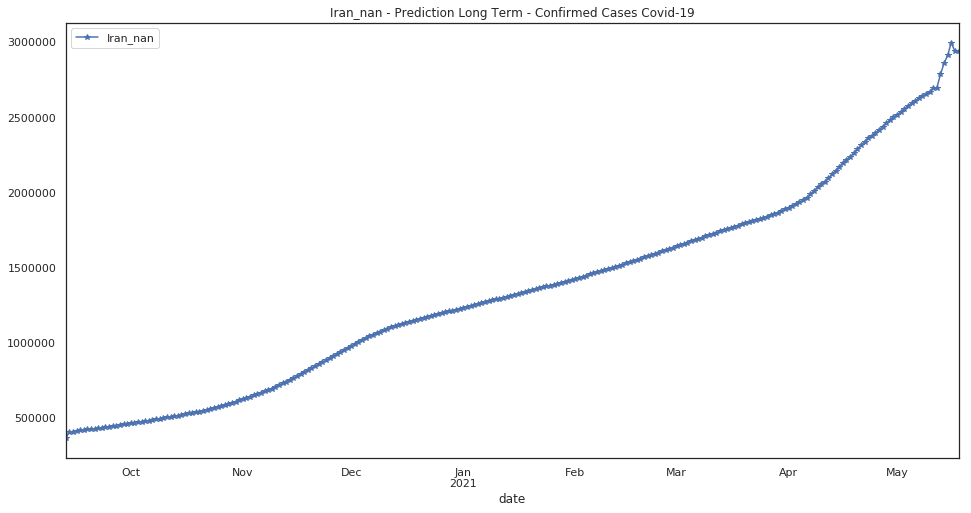

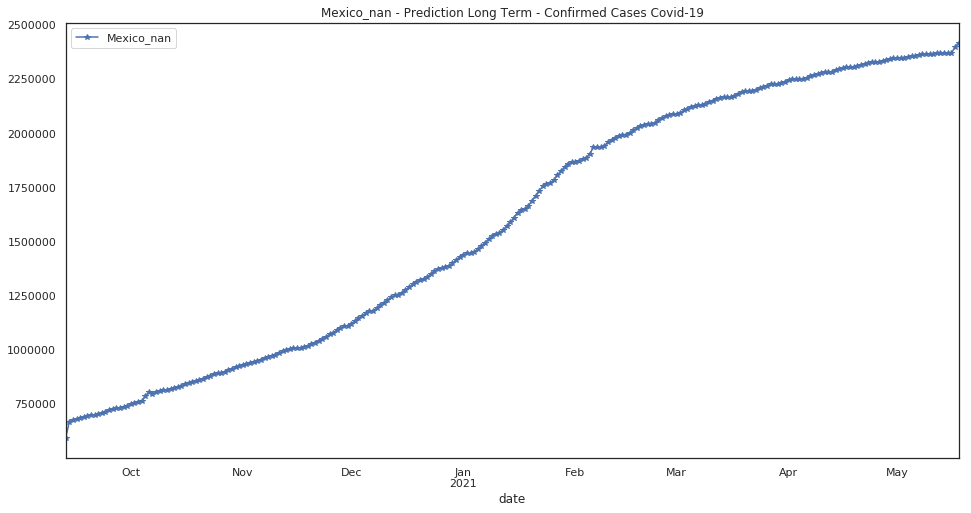

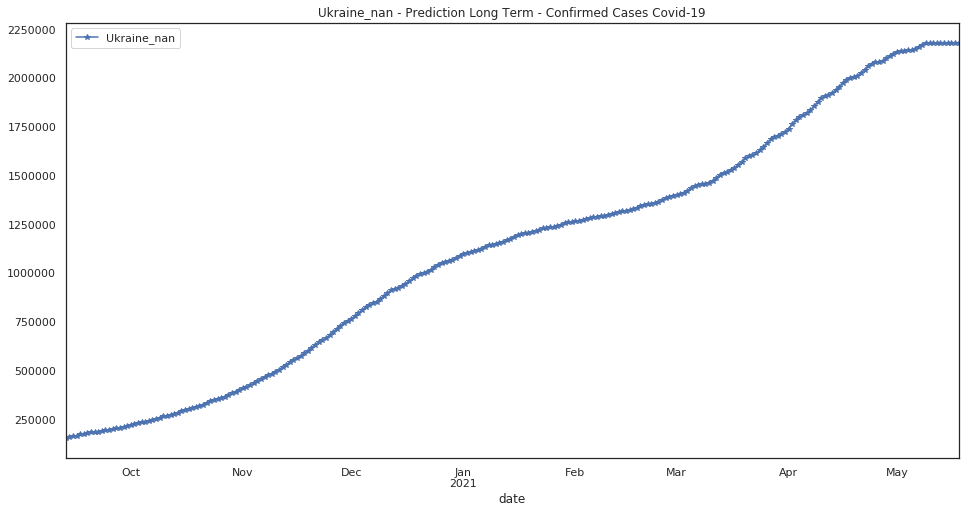

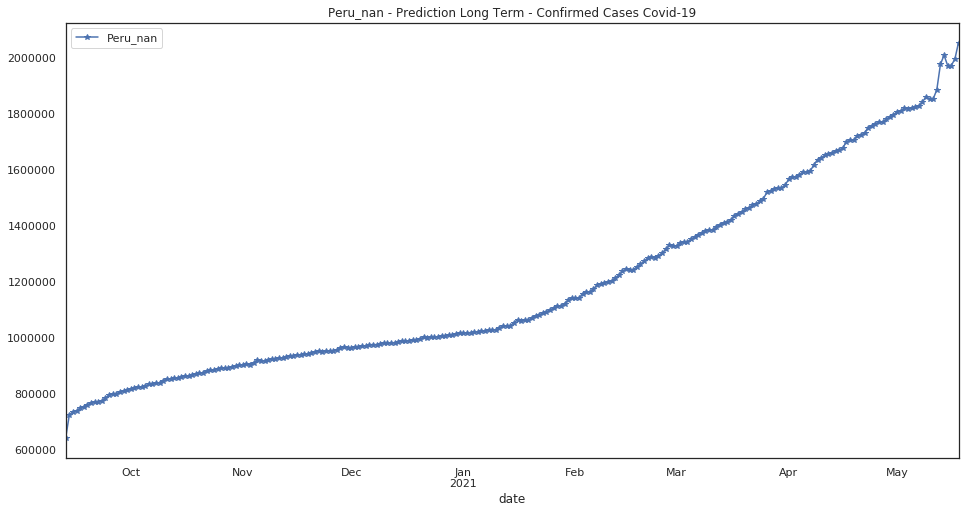

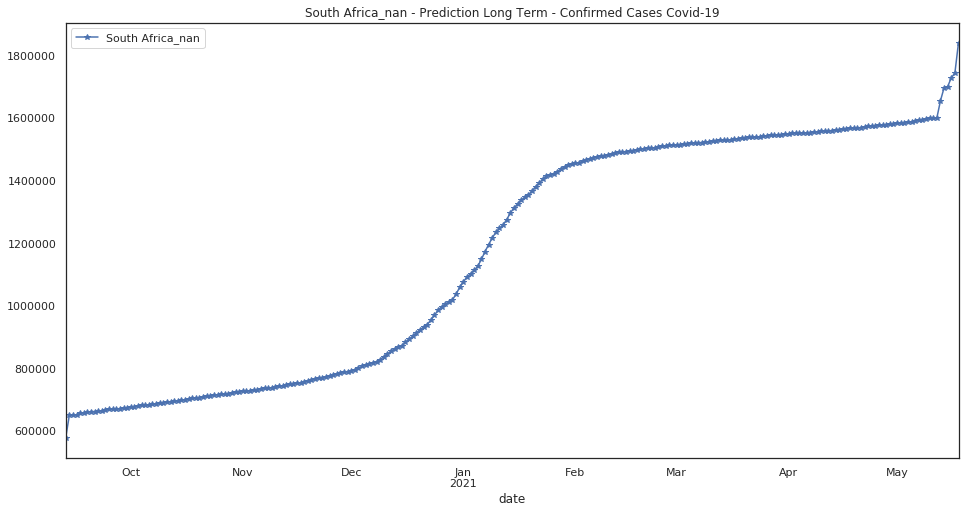

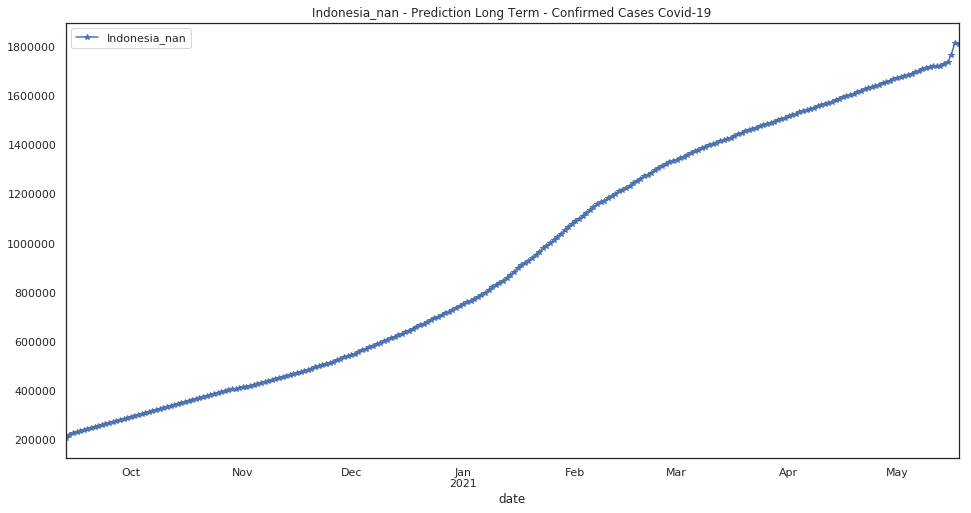

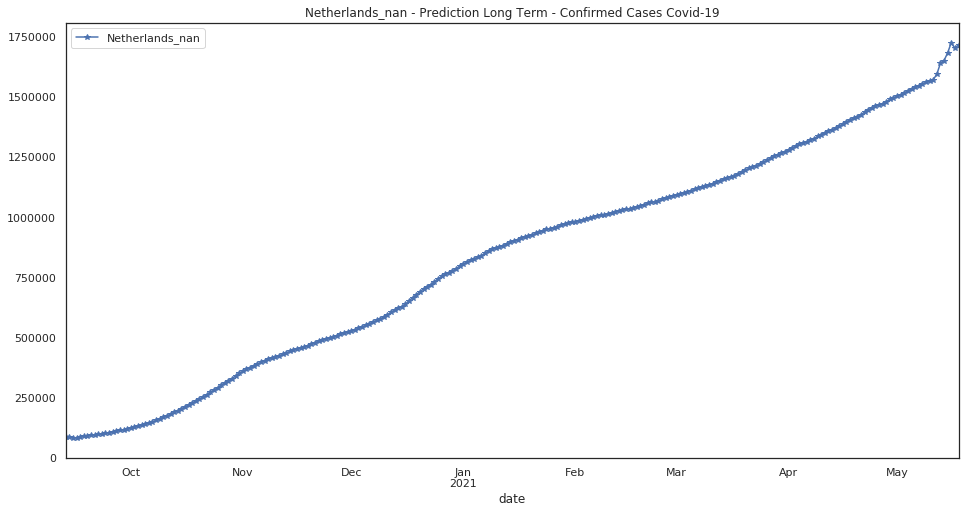

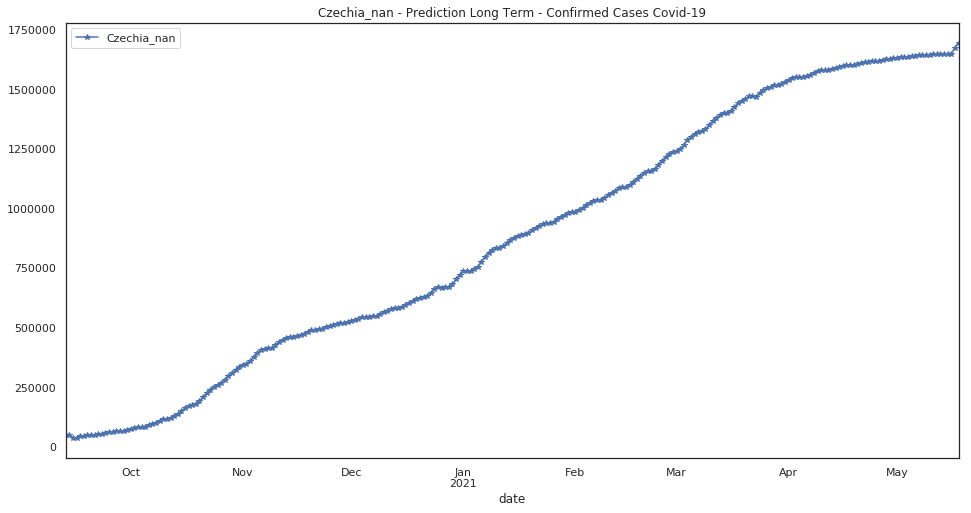

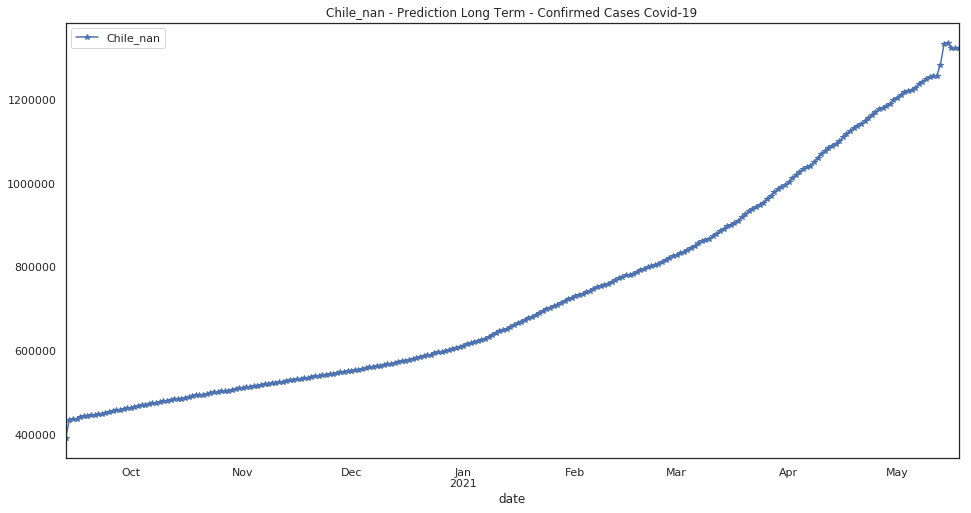

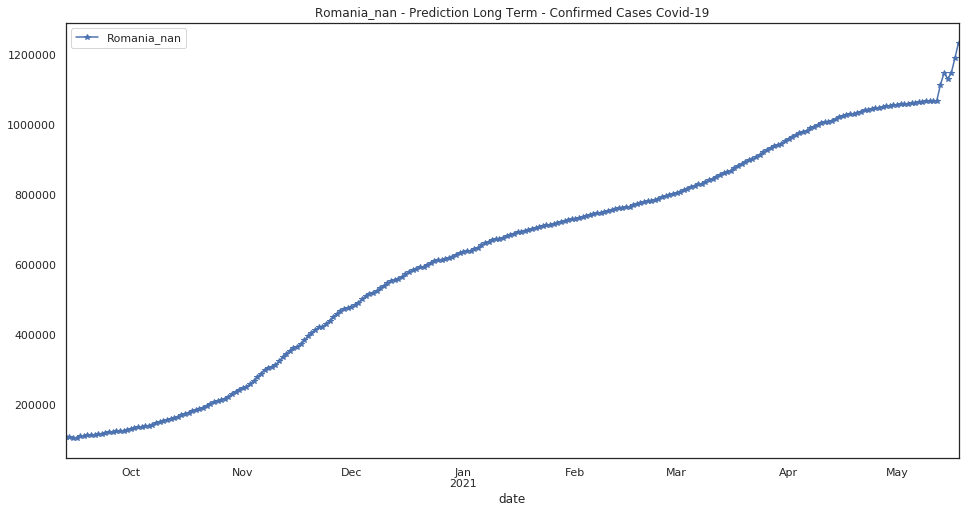

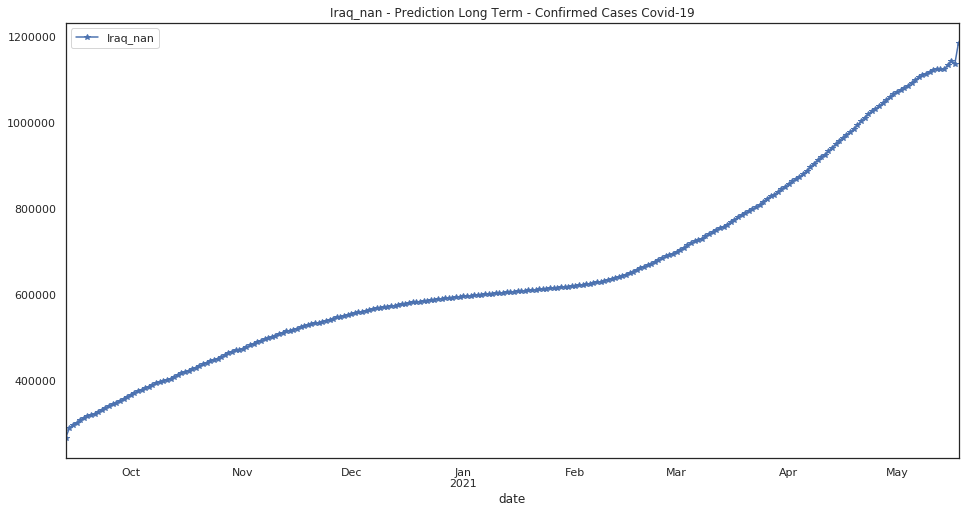

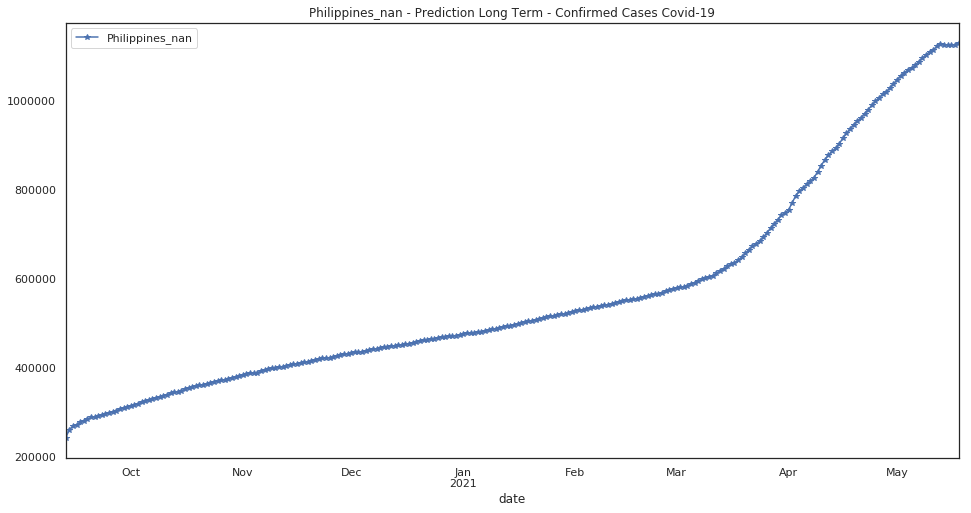

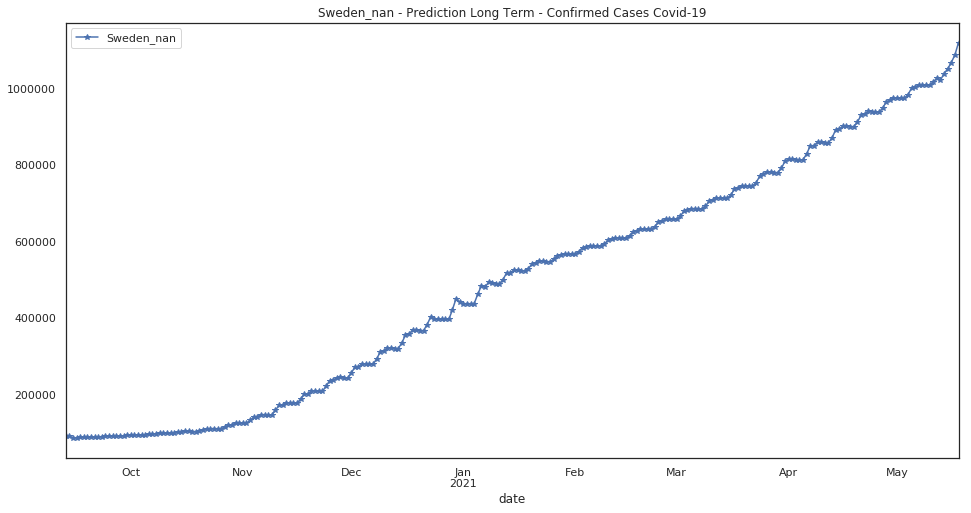

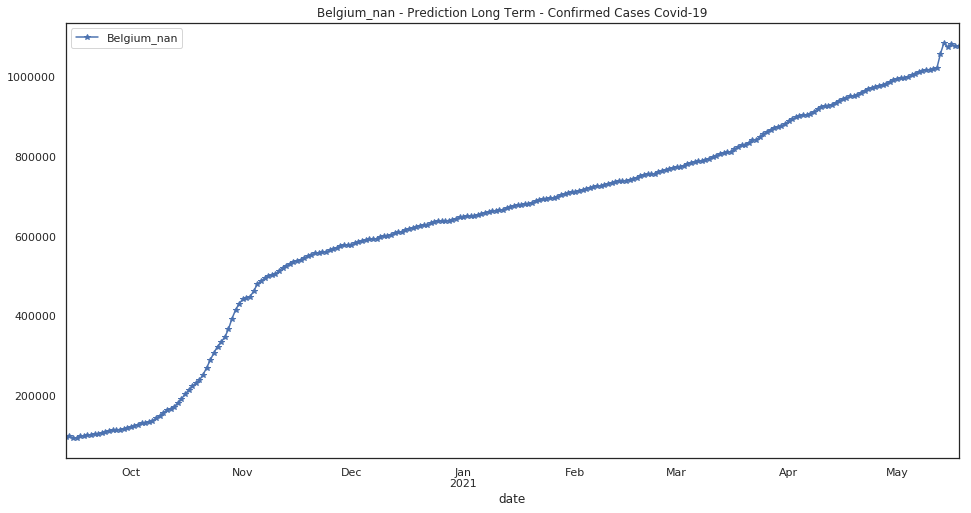

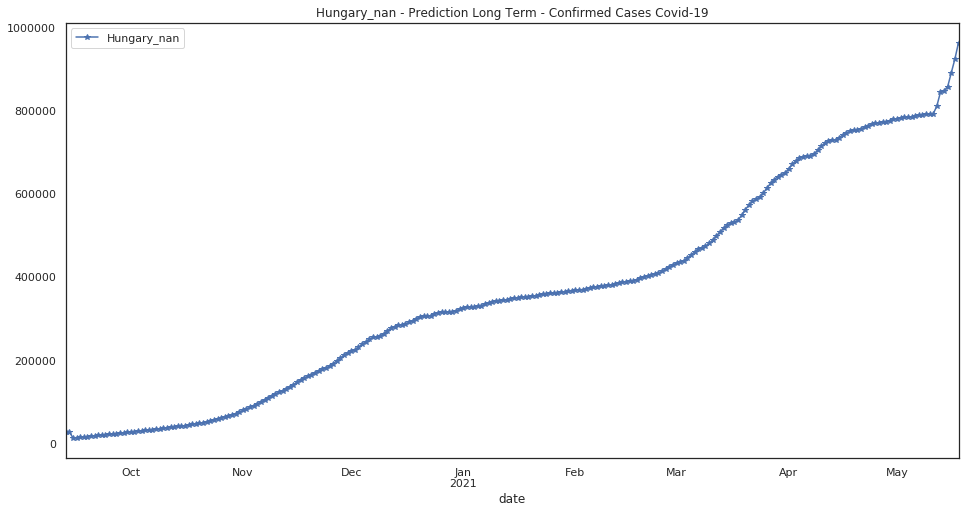

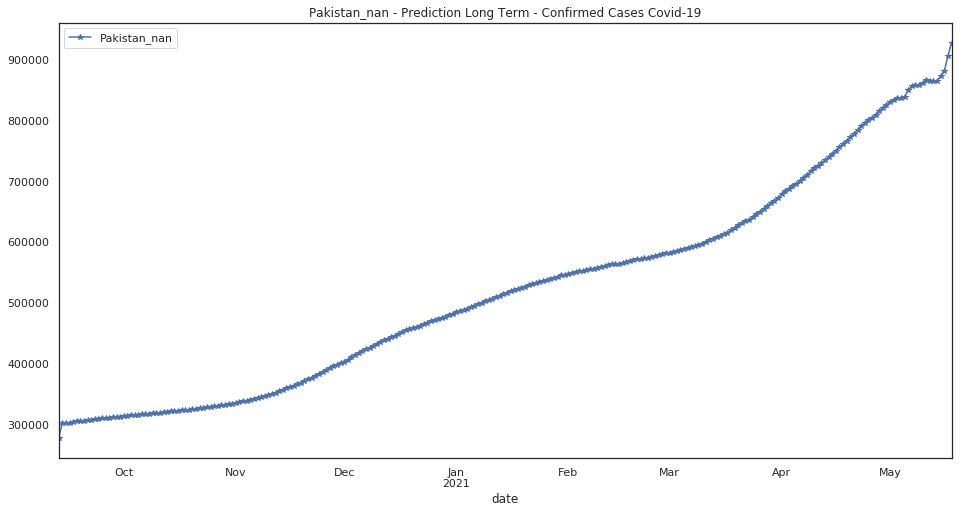

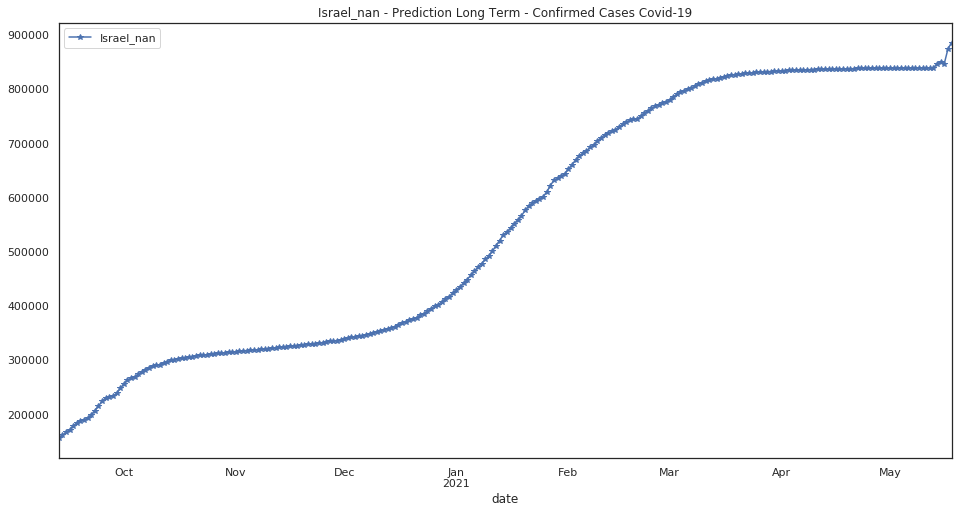

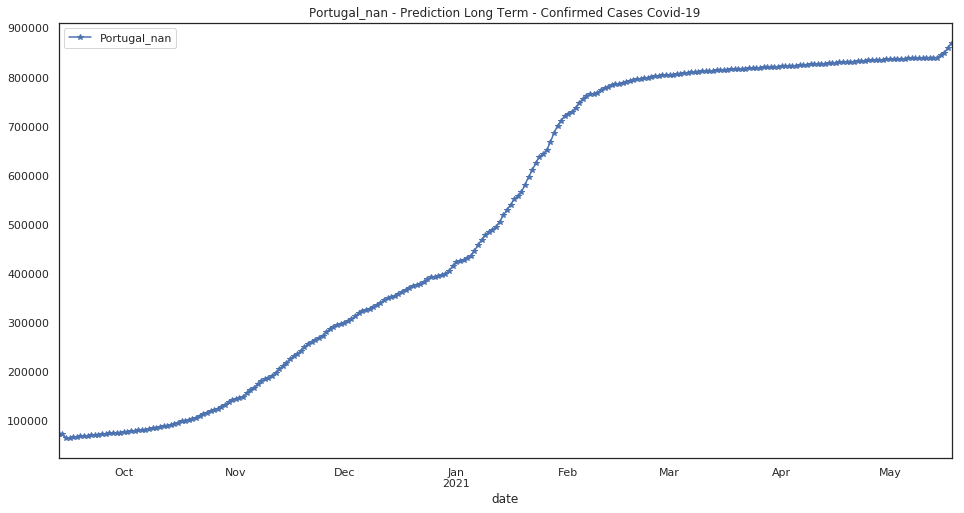

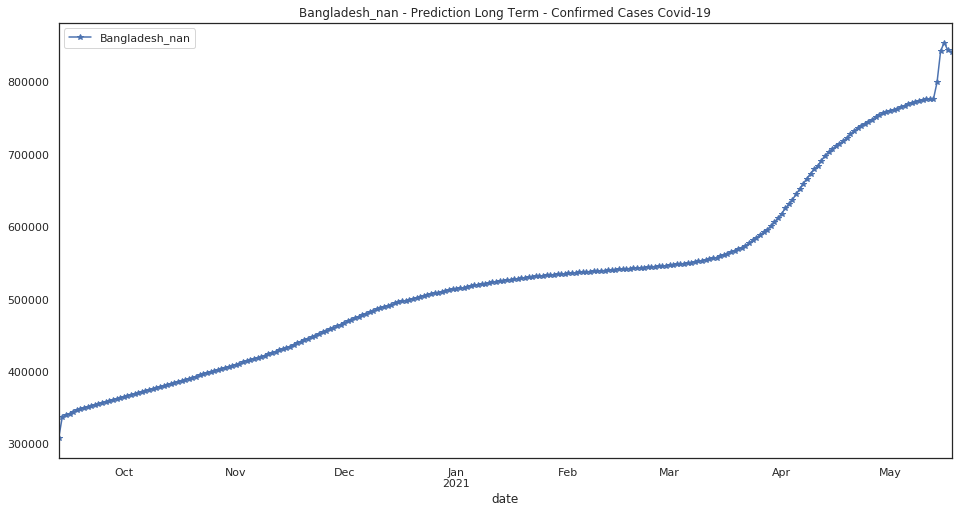

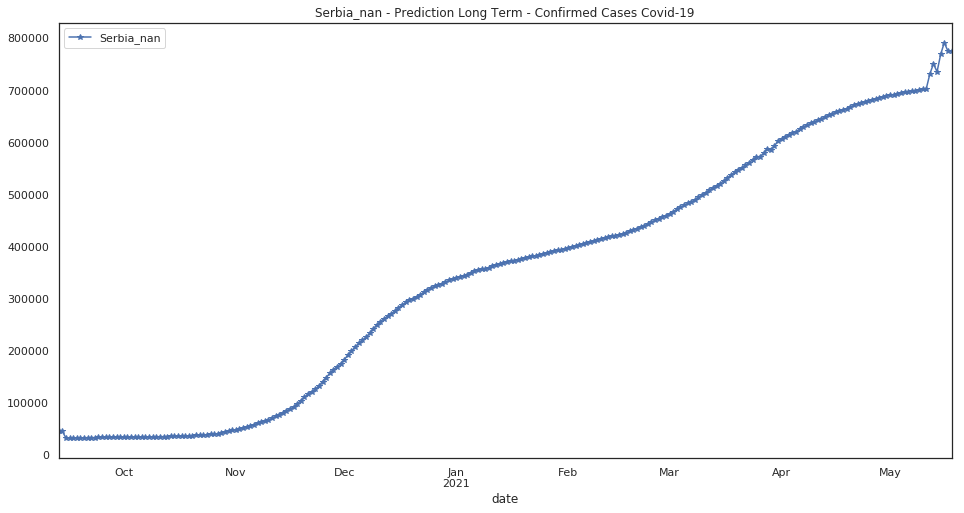

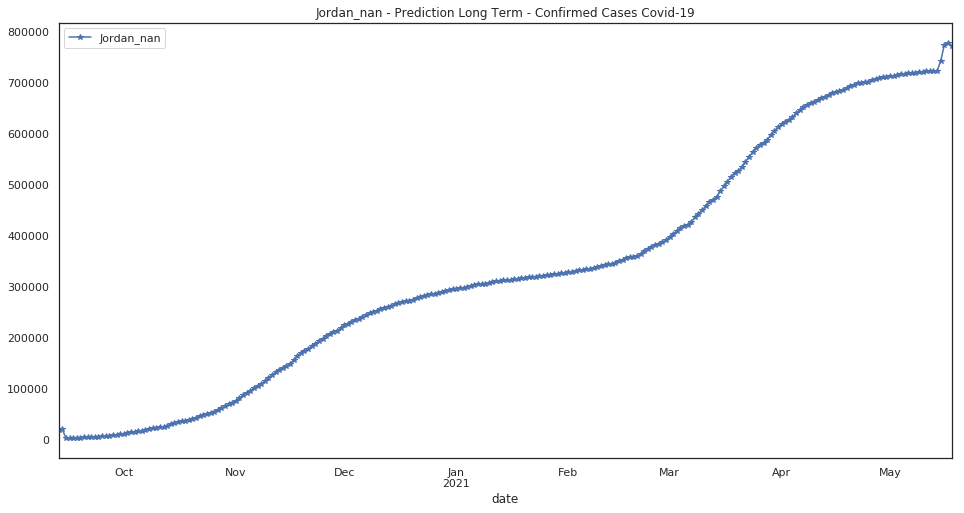

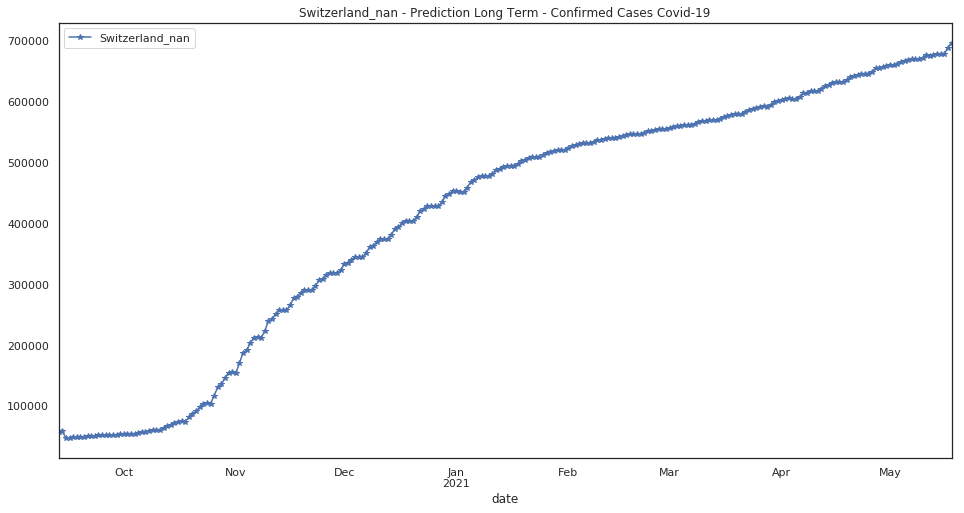

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

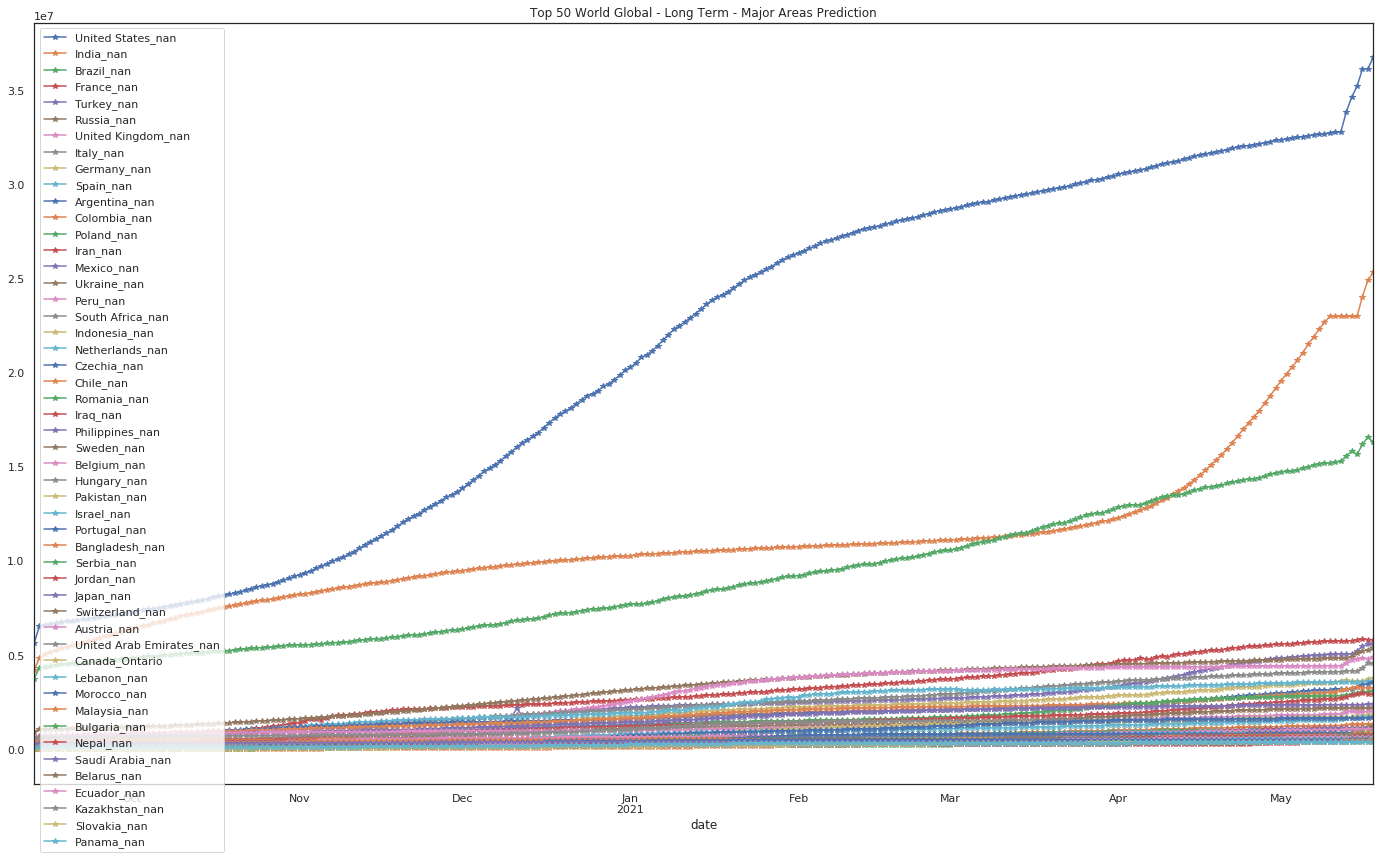

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

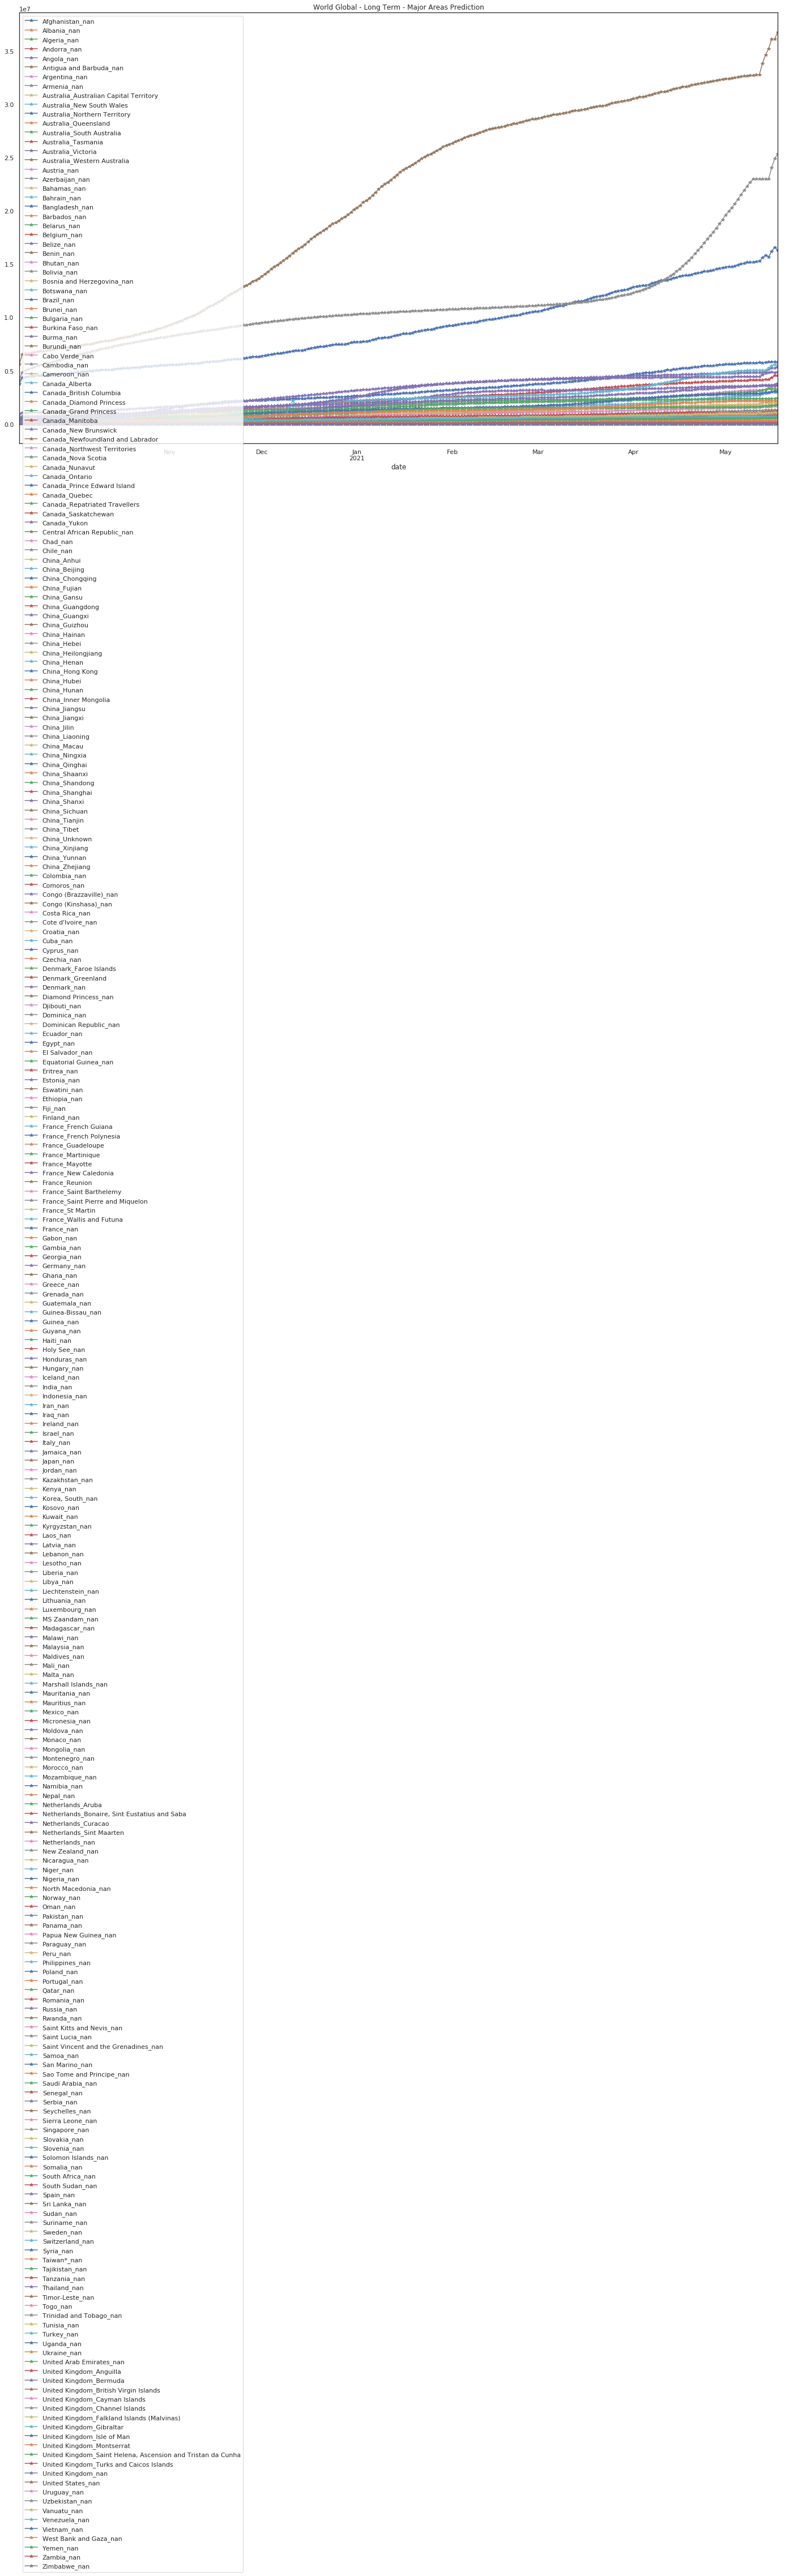

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41261.0      20010.0      57117.0       4410.0   
2020-10-29          41390.0      20280.0      57431.0       4517.0   
2020-10-30          41466.0      20611.0      57746.0       4567.0   
2020-10-31          41547.0      20850.0      58043.0       4665.0   
2020-11-01          41624.0      21192.0      58358.0       4756.0   
2020-11-02          41742.0      21487.0      58669.0       4825.0   
2020-11-03          41850.0      21863.0      59051.0       4888.0   
2020-11-04          41935.0      22250.0      59602.0       4966.0   
2020-11-05          42054.0      22670.0      60263.0       5045.0   
2020-11-06          42106.0      23150.0      60921.0       5135.0   
2020-11-07          42153.0      23631.0      61504.0       5318.0   
2020-11-08          42270.0      24133.0      62135.0       5319.0   
2020-11-09          42409.0      24658.0      62780.0       5383.0   
2020-11-10          42581.0      25207.0      63491.0       5437.0   
2020-11-11          42737.0      25715.0      64310.0       5477.0   
2020-11-12          42914.0      26151.0      65163.0       5567.0   
2020-11-13          43093.0      26641.0      66041.0       5616.0   
2020-11-14          43165.0      27144.0      66886.0       5725.0   
2020-11-15          43334.0      27728.0      67725.0       5816.0   
2020-11-16          43567.0      28337.0      68621.0       5872.0   
2020-11-17          43783.0      29031.0      69609.0       5914.0   
2020-11-18          44031.0      29741.0      70662.0       5951.0   
2020-11-19          44283.0      30522.0      71697.0       6018.0   
2020-11-20          44477.0      31347.0      72784.0       6066.0   
2020-11-21          44614.0      32095.0      73829.0       6142.0   
2020-11-22          44790.0      32689.0      74874.0       6207.0   
2020-11-23          45063.0      33447.0      75900.0       6256.0   
2020-11-24          45276.0      34170.0      76981.0       6304.0   
2020-11-25          45479.0      34833.0      78057.0       6351.0   
2020-11-26          45699.0      35507.0      79102.0       6428.0   
...                     ...          ...          ...          ...   
2021-04-19          58015.0     129656.0     119913.0      12805.0   
2021-04-20          58156.0     129779.0     120096.0      12805.0   
2021-04-21          58336.0     129943.0     120287.0      12874.0   
2021-04-22          58458.0     130079.0     120474.0      12917.0   
2021-04-23          58649.0     130235.0     120675.0      12942.0   
2021-04-24          58867.0     130386.0     120855.0      13007.0   
2021-04-25          58977.0     130510.0     121029.0      13024.0   
2021-04-26          59124.0     130583.0     121220.0      13060.0   
2021-04-27          59332.0     130678.0     121445.0      13083.0   
2021-04-28          59490.0     130826.0     121697.0      13121.0   
2021-04-29          59679.0     130943.0     121977.0      13148.0   
2021-04-30          59862.0     131055.0     122243.0      13198.0   
2021-05-01          60045.0     131154.0     122433.0      13232.0   
2021-05-02          60239.0     131211.0     122624.0      13232.0   
2021-05-03          60408.0     131238.0     122817.0      13282.0   
2021-05-04          60659.0     131276.0     123078.0      13295.0   
2021-05-05          60917.0     131369.0     123386.0      13316.0   
2021-05-06          61256.0     131481.0     123595.0      13340.0   
2021-05-07          61591.0     131556.0     123791.0      13363.0   
2021-05-08          61869.0     131637.0     124005.0      13390.0   
2021-05-09          61985.0     131707.0     124200.0      13406.0   
2021-05-10          62125.0     131726.0     124386.0      13423.0   
2021-05-11          62470.0     131761.0     124571.0      13429.0   
2021-05-12          62541.0     131803.0     124607.0      13449.0   
2021-05-13

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
251                                    Timor-Leste_nan  -8.874217  125.727539   
252                                           Togo_nan   8.619500    0.824800   
253                            Trinidad and Tobago_nan  10.691800  -61.222500   
254                                        Tunisia_nan  33.886917    9.537499   
255                                         Turkey_nan  38.963700   35.243300   
256                                  United States_nan  40.000000 -100.000000   
257                                         Uganda_nan   1.373333   32.290275   
258                                        Ukraine_nan  48.379400   31.165600   
259                           United Arab Emirates_nan  23.424076   53.847818   
260                            United Kingdom_Anguilla  18.220600  -63.068600   
261                             United Kingdom_Bermuda  32.307800  -64.750500   
262              United Kingdom_British Virgin Islands  18.420700  -64.640000   
263                      United Kingdom_Cayman Islands  19.313300  -81.254600   
264                     United Kingdom_Channel Islands  49.372300   -2.364400   
265         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
266                           United Kingdom_Gibraltar  36.140800   -5.353600   
267                         United Kingdom_Isle of Man  54.236100   -4.548100   
268                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      22               Belarus_nan  53.709800   27.953400   
4      23               Belgium_nan  50.833300    4.469936   
5      30                Brazil_nan -14.235000  -51.925300   
6      32              Bulgaria_nan  42.733900   25.485800   
7      51            Canada_Ontario  51.253800  -85.323200   
8      59                 Chile_nan -35.675100  -71.543000   
9      94              Colombia_nan   4.570900  -74.297300   
10    103               Czechia_nan  49.817500   15.473000   
11    111               Ecuador_nan  -1.831200  -78.183400   
12    132                France_nan  46.227600    2.213700   
13    137               Germany_nan  51.165691   10.451526   
14    149               Hungary_nan  47.162500   19.503300   
15    151                 India_nan  20.593684   78.962880   
16    152             Indonesia_nan  -0.789300  113.921300   
17    153                  Iran_nan  32.427908   53.688046   
18    154                  Iraq_nan  33.223191   43.679291   
19    156                Israel_nan  31.046051   34.851612   
20    157                Israel_nan  31.046051   34.851612   
21    158                 Italy_nan  41.871940   12.567380   
22    160                 Japan_nan  36.204824  138.252924   
23    161                Jordan_nan  31.240000   36.510000   
24    162            Kazakhstan_nan  48.019600   66.923700   
25    170               Lebanon_nan  33.854700   35.862300   
26    171               Lebanon_nan  33.854700   35.862300   
27    181              Malaysia_nan   4.210484  101.975766   
28    188                Mexico_nan  23.634500 -102.552800   
29    194               Morocco_nan  31.791700   -7.092600   
30    197                 Nepal_nan  28.166700   84.250000   
31    202           Netherlands_nan  52.132600    5.291300   
32    210              Pakistan_nan  30.375300   69.345100   
33    211                Panama_nan   8.538000  -80.782100   
34    214                  Peru_nan  -9.190000  -75.015200   
35    215           Philippines_nan  12.879721  121.774017   
36    216                Poland_nan  51.919400   19.145100   
37    217              Portugal_nan  39.399900   -8.224500   
38    219               Romania_nan  45.943200   24.966800   
39    220                Russia_nan  61.524010  105.318756   
40    228          Saudi Arabia_nan  23.885942   45.079162   
41    230                Serbia_nan  44.016500   21.005900   
42    234              Slovakia_nan  48.669000   19.699000   
43    238          South Africa_nan -30.559500   22.937500   
44    240                 Spain_nan  40.463667   -3.749220   
45    244                Sweden_nan  60.128161   18.643501   
46    245           Switzerland_nan  46.818200    8.227500   
47    255                Turkey_nan  38.963700   35.243300   
48    256         United States_nan  40.000000 -100.000000   
49    258               Ukraine_nan  48.379400   31.165600   
50    259  United Arab Emirates_nan  23.424076   53.847818   
51    271        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              496388.0             555537.0             578645.0   
1               45780.0              46110.0              33541.0   
2              308325.0             337520.0             339804.0   
3               81159.0              81321.0              74360.0   
4               97792.0              98526.0              94306.0   
5             3752665.0            4330455.0            4382331.0   
6               32633.0              32757.0              18061.0   
7               57276.0              57638.0              46905.0   
8              392195.0             434748.0             436625.0   
9              635080.0    

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=2)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred , parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()

In [94]:
num_days_R_prediction=14
ndaysavg=num_days_R_prediction
backday=num_BackTrack_Days
ndayarray=-1-backday-num_days_R_prediction
n2dayarray=-1-backday-(num_days_R_prediction*2)
print(str(ndaysavg)+' '+str(ndayarray)+' '+str(n2dayarray))

14 -15 -29
